# 1 Introduction

## 1.1 Context

The goal of this project is to explore various machine learning techniques applied to the fused dataset FUSION.csv, which combines two datasets:

kc_house_data.csv : Contains information about houses (price, square footage, number of bedrooms, location, etc.). <br>
MORTGAGE30US.csv : Provides data on average 30-year mortgage rates in the United States.

The final dataset (FUSION.csv) consists of 4117 observations with 22 columns , obtained by merging these two sources using the date as the common key. The dataset has been cleaned, normalized, and enriched with derived features such as:

age: Current year minus the year of construction.<br>
sqft_grade_interaction: Interaction between living space (sqft_living) and the grade of the house.

## 1.2 Objectives

The main objectives of this project are:

- To apply a clustering algorithm (DBSCAN ) to the dataset after dimensionality reduction.
- To analyze the results of the clustering, interpret the clusters, and understand how hyperparameter changes impact the interpretation.
- For the final project, we will choose one technical problem (classification, regression, clustering, or dimensionality reduction) and compare four models addressing the same problem using different algorithm families (e.g., partition-based vs. density-based clustering, linear vs. non-linear regression, etc.).
- We will optimize the hyperparameters of the algorithms using two techniques: Grid Search and Random Search (or Bayesian Optimization).

## 1.3 Methodology

To achieve these objectives, we will follow these steps:

### Data Preparation :
- Load and inspect the quality of the dataset.
- Normalize/standardize the data for better performance of the algorithms.
### Dimensionality Reduction :
- Choose a dimensionality reduction technique to reduce the complexity of the data while preserving meaningful patterns.
- Justify the choice based on the nature of the dataset and the problem at hand.
### Clustering with DBSCAN :
- Use DBSCAN to identify natural groupings in the reduced-dimensional data.
- Analyze the clusters and their significance in relation to the original features.
### Hyperparameter Impact :
- Explore the impact of hyperparameters (eps and min_samples) on DBSCAN's performance.
- Visualize the impact of the key hyperparameters (eps and min_samples) on the clustering results
### Final Project: Comparison of Four Models :
- Select one technical problem (classification, regression, clustering, or dimensionality reduction).
- Implement four models from different algorithm families to solve the chosen problem.
- Optimize the hyperparameters of the algorithms using two techniques 
- Evaluate and compare their performances, explaining why some models may be better suited than others.

## 1.4 Importance of the Project

This project aims to deepen our understanding of several key machine learning concepts:

- Data preprocessing and cleaning.
- Dimensionality reduction techniques like PCA and UMAP.
- Clustering algorithms such as DBSCAN.
- Hyperparameter optimization methods (Grid Search and Random Search). 

It also provides an opportunity to learn how to interpret model results and choose the best approach for a given problem.

# 2 Data Preparation

Before proceeding with analysis, it is essential to verify the quality of the dataset by checking for missing values and duplicates.

In [58]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [59]:
# Loading the merged dataset
df = pd.read_csv('FUSION.csv')

In [60]:
# Display first lines
print("Overview of the dataset:")
display(df.head())

Overview of the dataset:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,MORTGAGE30US
0,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,3.66
1,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3.86
2,1175000570,2015-03-12,530000.0,5,2.0,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,3.86
3,1875500060,2014-07-31,395000.0,3,2.0,1890,14040,2.0,0,0,...,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,4.12
4,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,...,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,4.12


In [61]:
# Shape and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("Available columns:")
display(df.columns)

Number of rows: 4117
Number of columns: 22
Available columns:


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'MORTGAGE30US'],
      dtype='object')

In [62]:
# Checking missing values
print("\nMissing values:")
display(df.isnull().sum())


Missing values:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
MORTGAGE30US     0
dtype: int64

Missing values are checked using isnull().sum() to ensure there are no gaps in the data.

In [63]:
# Checking duplicated data
print(f"\nNumber of duplicates: {df.duplicated().sum()}")


Number of duplicates: 0


Duplicates are verified using duplicated().sum() to avoid redundancy in the dataset.

In [64]:
# Adding derived features
df['age'] = 2024 - df['yr_built']
df['sqft_grade_interaction'] = df['sqft_living'] * df['grade']

- age: Calculated as the difference between the current year (2024) and the year the house was built (yr_built). This helps capture the age of the property. 
- sqft_grade_interaction: Represents the interaction between living space (sqft_living) and the grade of the house (grade). This feature may help identify patterns related to property quality.

In [65]:
# Selecting relevant columns
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'yr_built', 'yr_renovated', 'lat', 'long', 'MORTGAGE30US', 
            'age', 'sqft_grade_interaction']

df = df[features]

We select relevant features for clustering based on their potential impact on grouping patterns. These include:

- House-related features: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade. <br>
- Location-related features: lat, long. <br>
- Time-related features: yr_built, yr_renovated, age. <br>
- Interaction feature: sqft_grade_interaction (interaction between sqft_living and grade).

In [66]:
# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Conversion en DataFrame pour plus de lisibilité
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [67]:
# Display normalized data
print("\nNormalized data:")
display(df_scaled.head())


Normalized data:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction
0,-0.693801,-0.403908,-0.801577,-1.126662,-0.136014,-0.913608,-0.084225,-0.306105,-0.623815,-0.537939,-0.265699,-0.216903,-1.054429,-0.691774,-1.557282,0.265699,-0.924817
1,-0.603647,-0.403908,0.506297,-0.200188,-0.221663,0.945672,-0.084225,-0.306105,-0.623815,-0.537939,1.095699,-0.216903,-1.349135,1.330704,-0.546167,-1.095699,-0.339489
2,-0.004554,1.729369,-0.147640,-0.289487,-0.268143,0.016032,-0.084225,-0.306105,-0.623815,-0.537939,-2.409902,-0.216903,0.813476,-1.254365,-0.546167,2.409902,-0.395906
3,-0.395267,-0.403908,-0.147640,-0.200188,-0.018345,0.945672,-0.084225,-0.306105,-0.623815,-0.537939,0.789385,-0.216903,1.227212,1.822081,0.768283,-0.789385,-0.339489
4,-0.134791,0.662731,-1.455515,-0.523896,-0.283093,0.016032,-0.084225,-0.306105,0.889589,-0.537939,-1.865343,-0.216903,0.776190,-0.891173,0.768283,1.865343,-0.544001


Clustering algorithms like DBSCAN rely on distance metrics, so it is crucial to normalize the data to ensure all features contribute equally to the analysis <br>
Normalization ensures that features with larger scales (e.g., price, sqft_living) do not dominate the clustering process. <br>
The normalized data is converted back to a Pandas DataFrame for easier interpretation.

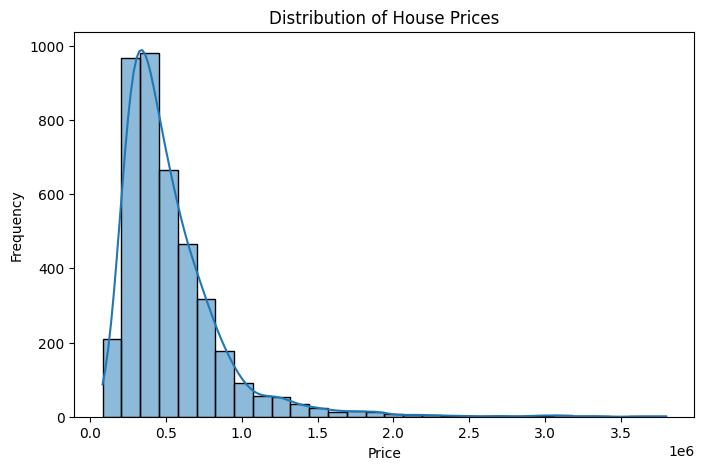

In [68]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

- The majority of homes are priced between $300,000 and $500,000, which is the most common range.
- The distribution is skewed to the right, indicating the presence of a few luxury homes with much higher prices (up to about $3,800,000).
- The outliers on the right likely represent exceptional properties, such as villas or houses located in highly sought-after areas.

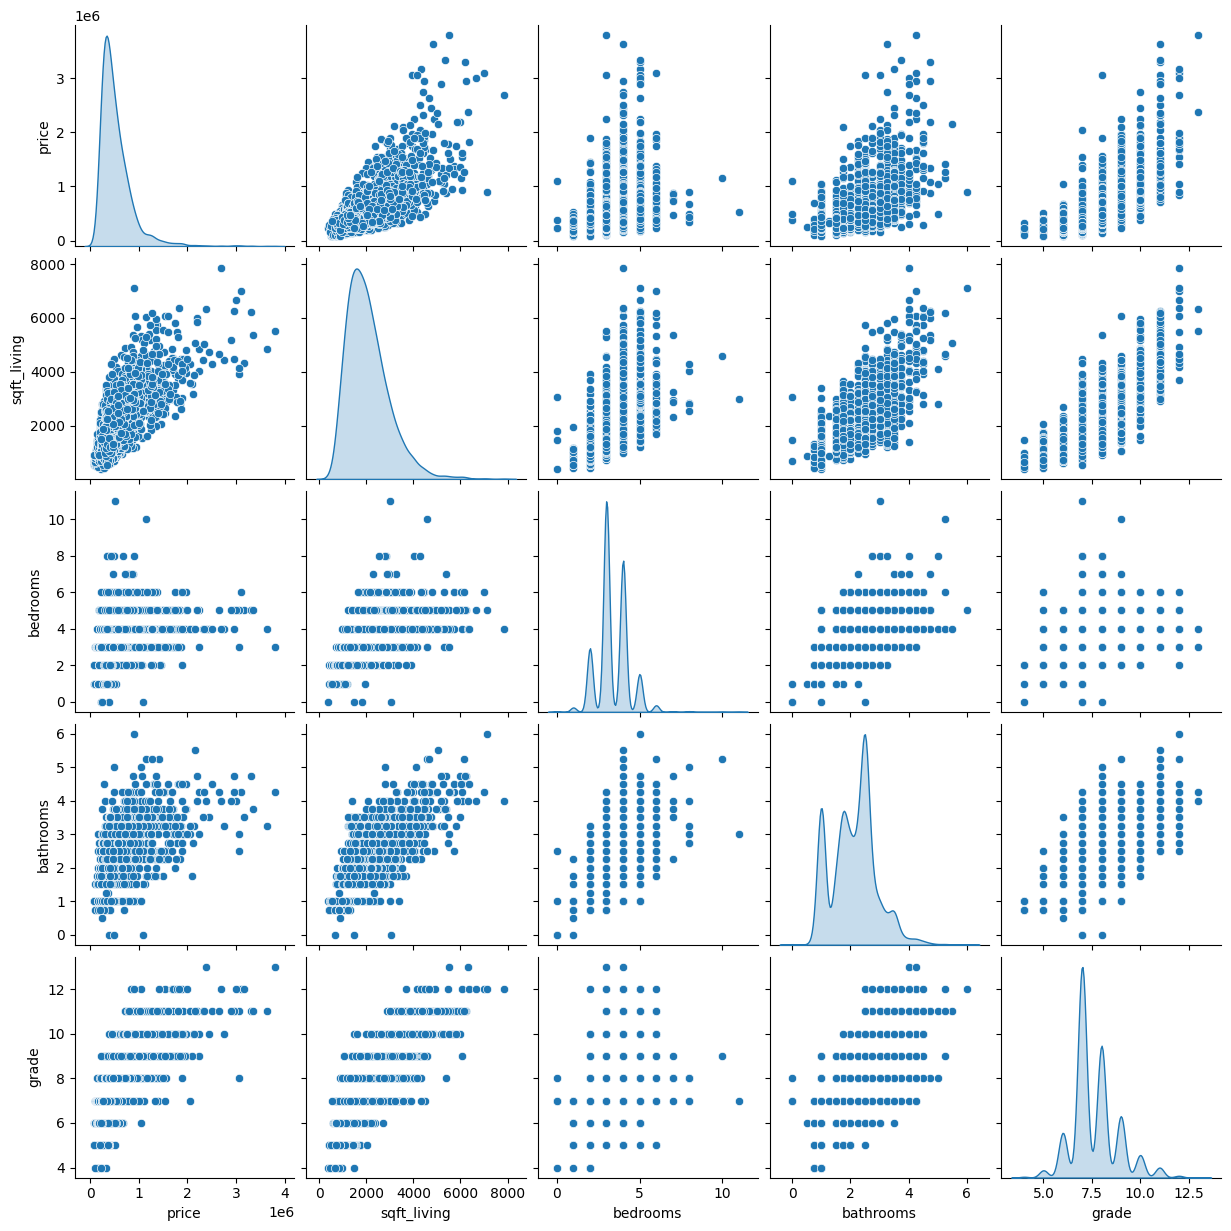

In [69]:
# Pairplot to visualize relationships between selected features
selected_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

price vs sqft_living :
A strong positive correlation is visible between price and sqft_living. This means that larger homes are generally more expensive.

price vs bedrooms :
There is no obvious linear relationship between price and number of bedrooms. This can be explained by the fact that other factors (such as location or grade) also influence price.

price vs bathrooms :
A slight positive trend is observable, showing that homes with more bathrooms tend to cost more.

price vs grade :
A strong positive correlation exists between price and home grade. Homes with a better grade (quality of construction and finishes) are significantly more expensive.

Diagonal plots show the distribution of each individual variable. For example, sqft_living follows a normal distribution, while bedrooms is discrete.

A brief exploration of the dataset helps us understand its characteristics and distribution. <br>
At the end of this step, the dataset is ready for further analysis:

- Missing values and duplicates have been checked and confirmed absent.
- Derived features (age, sqft_grade_interaction) have been added to enrich the dataset.
- The data has been normalized to ensure consistent scales across features.

This preparation ensures that subsequent steps, such as dimensionality reduction and clustering, will yield meaningful results.

# 3 Dimensionality Reduction

## 3.1 Introduction

Dimension reduction aims to project data into a lower-dimensional space while preserving as much important information as possible. This step is crucial for:
- Reduce the complexity of the dataset.
- Eliminate noise and capture essential relationships between variables.
- Facilitate the visualization and interpretation of clusters.

In our case, we chose to use UMAP (Uniform Manifold Approximation and Projection) for several reasons:
- The "curse of dimensionality" problem: Distance-based algorithms, such as DBSCAN, suffer from degraded performance when the number of dimensions increases. This results in a loss of sensitivity to local distances, making it difficult to identify meaningful clusters.
- Advantages of UMAP: Unlike PCA, which captures only the directions of maximum (linear) variance, UMAP better preserves the complex and nonlinear local structures of the data. This makes it an ideal choice to identify natural groups in our dataset.


## 3.2 Initial Experiment

Before dimensionality reduction, we tried to apply DBSCAN directly on the raw data. Here is what we observed

In [70]:
# Attempting to apply DBSCAN on raw data
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with eps=0.5 and min_samples=5
dbscan_raw = DBSCAN(eps=0.5, min_samples=5)
clusters_raw = dbscan_raw.fit_predict(df_scaled)

# Count the number of clusters and noise points
num_clusters_raw = len(set(clusters_raw)) - (1 if -1 in clusters_raw else 0)
num_noise_raw = list(clusters_raw).count(-1)

# Display results
print(f"Number of clusters after DBSCAN on raw data: {num_clusters_raw}")
print(f"Number of points considered as noise: {num_noise_raw}")

Number of clusters after DBSCAN on raw data: 4
Number of points considered as noise: 4093


Results:

Number of clusters identified: 4 (after applying DBSCAN to the raw data). <br>
Number of points considered as noise: 4093 (approximately 99.4% of the data).

Interpretation:

These results show that the direct application of DBSCAN to the raw data leads to limited and less meaningful segmentation:
- High noise rate: When we applied DBSCAN directly to the raw data with default parameters (eps=0.5 and min_samples=5), the majority of observations (approximately 99.4%) were classified as noise. This result indicates that these parameters were not able to capture dense groupings in the initial multidimensional space. This initial experiment confirms the importance of reducing dimensionality before applying DBSCAN to facilitate the detection of meaningful clusters. We will analyze in more detail in the following section how the choice of hyperparameters (eps and min_samples) influences the results and their interpretation.

- Impact of high dimensionality: The main issue lies in the "curse of dimensionality." With a large number of dimensions, the distances between points become less meaningful, making it difficult to identify dense clusters.

As a result, DBSCAN considers most points as isolated and therefore as noise.

Conclusion:

The results obtained with DBSCAN on the raw data clearly highlight its limitations in a high-dimensional context. To address this issue, it is essential to reduce the dimensionality of the data before applying the algorithm. This step will help capture the essential relationships between variables while simplifying the search space for DBSCAN.

## 3.3 Adopted Solution

To address this issue, we decided to reduce dimensionality before applying DBSCAN. After testing different techniques (PCA and UMAP), we chose UMAP for the following reasons:

Preservation of Local Structures:
UMAP is capable of capturing complex and non-linear relationships between variables, which is crucial for identifying meaningful clusters.

Superior Performance:
Compared to PCA, UMAP produced more granular and relevant results in our previous experiments.

3D Visualization:
UMAP allows for 3D projection, which facilitates the visual interpretation of clusters.

## 3.4 Implementation of UMAP

In [71]:
# Importing UMAP
import umap.umap_ as umap

# Dimensionality reduction with UMAP (3D)
umap_reducer = umap.UMAP(n_components=3, random_state=42)
df_umap = umap_reducer.fit_transform(df_scaled)

# Converting to DataFrame for easier analysis
df_umap = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



We chose n_components=3 to project the data into 3D space, making it easier to visualize while retaining enough information. <br>
The random_state=42 parameter ensures reproducibility of the results.

## 3.5 Visualization of Results and Analysis of Information Retained or Lost

In [72]:
df_umap

,UMAP_1,UMAP_2,UMAP_3
0,9.971899,12.671098,8.372854
1,10.444705,1.939079,10.051884
2,9.455112,12.080676,6.247085
3,11.944988,5.025126,9.861812
4,11.548579,9.836367,3.180422
...,...,...,...
4112,9.786391,3.839981,9.902029
4113,9.933907,0.080883,3.881516
4114,9.651025,12.623500,9.576875
4115,10.107936,3.816766,7.953895


In [73]:
# Visualize UMAP-reduced data in 3D
import plotly.express as px

fig = px.scatter_3d(df_umap, x="UMAP_1", y="UMAP_2", z="UMAP_3", 
                    title="Data Projection with UMAP (3D)", opacity=0.7)
fig.show()

The projection shows that the data naturally groups into several distinct clusters.

#### Comparison with Original Data

After reducing dimensionality with UMAP, it is important to discuss the information retained or lost:

Retained Information:
- UMAP preserves the local structures of the data, meaning that the similarities between nearby points are well maintained.
- Some clusters might correspond to houses with similar characteristics in terms of price, size, or location.
- Outliers (isolated points) could represent atypical houses (luxurious or old).

Lost Information:
- Although UMAP preserves the local structures of the data, some global relationships (such as those related to variables like zipcode or yr_built) may be attenuated. However, in our case, these losses are minimal compared to the benefits brought by the simplification of the search space.

## 3.6 Conclusion

The UMAP dimensionality reduction technique successfully projects our high-dimensional dataset into a 3D space while preserving important local structures. This simplification will greatly enhance the performance of subsequent analyses, particularly clustering algorithms like DBSCAN. By reducing noise and focusing on meaningful patterns, UMAP ensures that the reduced dataset remains informative and interpretable.



# 4 Clustering with DBSCAN

Now that we have reduced the dimensionality of the data using UMAP, we can apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering algorithm.

## 4.1 Introduction with DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that identifies clusters based on two key hyperparameters:

- eps : The maximum distance between two points for them to be considered neighbors. A smaller value would result in fewer connections between points, potentially leading to more noise.
- min_samples : The minimum number of points required to form a dense region (cluster). Increasing this value would make it harder for points to form clusters, resulting in fewer but denser clusters.

Key advantages of DBSCAN include:

- Arbitrary Shapes : It can identify clusters of arbitrary shapes, unlike algorithms like K-Means, which assume spherical clusters.
- Robustness to Outliers : Points that do not belong to any dense region are classified as noise (-1), making DBSCAN robust to outliers.
- No Need to Specify the Number of Clusters : Unlike K-Means, DBSCAN does not require the number of clusters to be predefined.

However, DBSCAN's performance is highly sensitive to the choice of eps and min_samples. These hyperparameters must be carefully tuned to achieve meaningful results.

## 4.2 Applying DBSCAN to the UMAP-Reduced Data

After reducing the dimensionality of the dataset using UMAP, we applied DBSCAN to identify natural groupings in the data. Below is the implementation and an explanation of each step.

In [74]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the UMAP-reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_umap)

# Add the cluster labels to the original DataFrame
df['cluster_dbscan'] = clusters

# Count the number of clusters and noise points
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
num_noise = list(clusters).count(-1)

Initialization of DBSCAN : <br>
We initialize the DBSCAN algorithm with eps=0.5 and min_samples=5. These values were chosen as a starting point based on common practices and the nature of the dataset.

Fitting the Model :
- The fit_predict method is applied to the UMAP-reduced data (df_umap). This method performs clustering and assigns a cluster label to each point in the dataset.
- Points labeled as -1 are considered noise, meaning they do not belong to any dense cluster.

Adding Cluster Labels : <br>
The cluster labels are added as a new column (cluster_dbscan) in the original DataFrame (df). This allows us to analyze the clusters in relation to the original features of the dataset.

Counting Clusters and Noise Points :<br>
The number of clusters is calculated by counting the unique cluster labels, excluding -1 (noise). <br>
The number of noise points is determined by counting how many times -1 appears in the cluster labels.

In [75]:
print(f"Number of clusters identified: {num_clusters}")
print(f"Number of noise points: {num_noise}")

Number of clusters identified: 6
Number of noise points: 4


## 4.3 Analyzing the Results

#### Observations

Clusters Identified : DBSCAN successfully detected 6 distinct clusters in the UMAP-reduced data. These clusters represent natural groupings of houses with similar characteristics.

Noise Points : Out of the total dataset, only 4 points were classified as noise (-1) . This indicates that the majority of the data points belong to meaningful clusters, suggesting that the chosen hyperparameters (eps=0.5 and min_samples=5) are well-suited for this dataset.

#### Visualization in 3D

To better understand the structure of the clusters, we visualize the results in 3D using Plotly Express. The visualization provides an interactive way to explore how the data points are grouped into distinct clusters.

In [76]:
import plotly.express as px

# Prepare the data for visualization
df_plot = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
df_plot["cluster_dbscan"] = df["cluster_dbscan"]

# Interactive 3D visualization
fig = px.scatter_3d(df_plot, x="UMAP_1", y="UMAP_2", z="UMAP_3",
                    color=df_plot["cluster_dbscan"].astype(str),
                    title="DBSCAN Clusters after UMAP (3D)",
                    labels={"color": "Cluster"},
                    opacity=0.7)
fig.show()

- Cluster Size <br>
Cluster 1 (Red) : This is the largest cluster in terms of the number of data points. It appears to be a dense region with many houses sharing similar characteristics.
Cluster 0 (Blue) : This cluster is also relatively large but not as dense as Cluster 1. It seems to represent another significant group of houses.
Cluster 2 (Green) : This cluster is smaller compared to Clusters 0 and 1, indicating fewer houses with these specific features.
Cluster 4 (Orange) : This cluster is quite small and distinct from the others, suggesting that it represents a niche group of houses.
Cluster 5 (Cyan) : Similar to Cluster 4, this cluster is also small and separate, indicating another unique group of houses.
Cluster 3 (Purple) : This cluster is very small and located far from the other clusters, which might indicate atypical or luxury properties.
Noise Points (Pink) : There are a few noise points scattered around, which are not part of any dense region.

- Distance Between Clusters <br>
The distance between the clusters varies: <br>
Clusters 0 and 1 are relatively close to each other, indicating that they may share some common characteristics. <br>
Clusters 2, 4, and 5 are more separated from the main clusters (0 and 1), suggesting that they have distinct features.<br>
Cluster 3 is isolated, showing that it represents a very different type of property.

- Intra-Cluster Cohesion <br>
Clusters 0 and 1 : These clusters show good intra-cluster cohesion, meaning that the houses within these clusters are closely related to each other in terms of their features.<br>
Clusters 2, 4, and 5 : These clusters also exhibit good cohesion, although they are smaller in size.<br>
Cluster 3 : This cluster has high cohesion despite its small size, indicating that the few houses it contains are very similar to each other.

- Inter-Cluster Separation <br>
The separation between the clusters is clear, especially for Cluster 3, which is far from the others.<br>
Clusters 2, 4, and 5 are also well-separated from the main clusters, making it easier to distinguish them.<br>
The separation between Clusters 0 and 1 is less pronounced, which could indicate some overlap in their characteristics.

- Shape of Clusters <br>
Clusters 0 and 1 : These clusters have irregular shapes, reflecting the complex relationships between the features.<br>
Clusters 2, 4, and 5 : These clusters also have irregular shapes, indicating that they capture non-linear patterns in the data.<br>
Cluster 3 : This cluster has a more compact shape, suggesting that the houses it contains are tightly grouped together.

- Additional Observations <br>
The presence of noise points (pink) indicates that there are some houses that do not fit into any of the identified clusters. These could be outliers or houses with unique characteristics.<br>
The distribution of the clusters suggests that the dataset contains diverse types of houses, ranging from common properties (Clusters 0 and 1) to luxury or atypical homes (Cluster 3).

## 4.4 Interpreting the Clusters

We will now interpret the clusters identified by DBSCAN after applying UMAP for dimensionality reduction. We'll start by examining the distribution of the clusters and then delve into the characteristics of each cluster in detail. <br>
Let's visualize the distribution of the clusters to understand their relative sizes.

C:\Users\ousma\AppData\Local\Temp\ipykernel_28608\2175537872.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




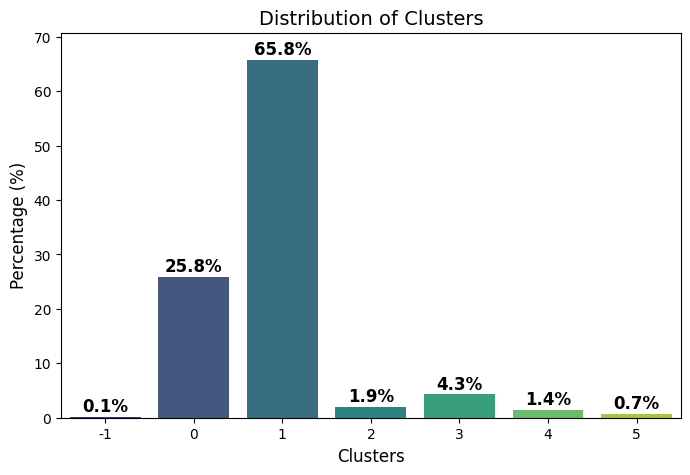

In [77]:
# Count occurrences of each cluster
cluster_counts = df['cluster_dbscan'].value_counts(normalize=True) * 100  # In percentage
cluster_counts_sorted = cluster_counts.sort_index()  # Sort by index if necessary

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cluster_counts_sorted.index, y=cluster_counts_sorted.values, palette="viridis")

# Add percentages above the bars
for i, percentage in enumerate(cluster_counts_sorted.values):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Clusters", fontsize=14)
plt.ylim(0, max(cluster_counts_sorted.values) + 5)  # Adjust scale to display labels
plt.show()

Cluster 1, comprising approximately 65% of the data points, represents the most prevalent group of houses with similar characteristics. Smaller clusters, such as Cluster 5 which makes up only about 0.7%, likely represent niche groups or outliers. This distribution suggests that the majority of houses share common features, while a few distinct groups exhibit unique attributes.

Now, let's examine the characteristics of each cluster more closely by calculating descriptive statistics for the relevant features.


In [78]:
cluster_0 = df[df['cluster_dbscan'] == 0]

# Calculate descriptive statistics for cluster 0
cluster_0.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan
count,1.063000e+03,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.0,1063.000000,1063.000000,1063.000000,1063.000000,1063.0,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.0
mean,3.912385e+05,3.104421,1.649577,1611.382879,10613.370649,1.072437,0.0,0.009407,2.962371,7.016933,1959.161806,0.0,47.565046,-122.252845,3.957883,64.838194,11585.346190,0.0
std,1.787274e+05,0.928422,0.606941,570.649486,11893.403954,0.205669,0.0,0.105881,0.209238,0.808206,24.979090,0.0,0.143254,0.112073,0.197898,24.979090,5013.010769,0.0
min,8.250000e+04,0.000000,0.500000,390.000000,1642.000000,1.000000,0.0,0.000000,1.000000,4.000000,1900.000000,0.0,47.192300,-122.509000,3.590000,10.000000,1560.000000,0.0
25%,2.550000e+05,3.000000,1.000000,1180.000000,6000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1946.000000,0.0,47.476100,-122.337000,3.760000,46.000000,7910.000000,0.0
50%,3.585000e+05,3.000000,1.750000,1540.000000,7800.000000,1.000000,0.0,0.000000,3.000000,7.000000,1961.000000,0.0,47.573200,-122.288000,4.010000,63.000000,10920.000000,0.0
75%,4.850000e+05,4.000000,2.000000,1960.000000,10234.500000,1.000000,0.0,0.000000,3.000000,7.000000,1978.000000,0.0,47.691200,-122.180500,4.130000,78.000000,14480.000000,0.0
max,1.545000e+06,8.000000,4.500000,3800.000000,105415.000000,2.500000,0.0,2.000000,3.000000,10.000000,2014.000000,0.0,47.777400,-121.865000,4.230000,124.000000,36800.000000,0.0


Cluster 0: Affordable, Established Homes <br>
With an average price of $391,238, this cluster represents more affordable housing options. These properties tend to be smaller, averaging 1611 sqft of living space, with around 3 bedrooms and 1.65 bathrooms. Built around 1959, these properties are generally older and smaller in size compared to other clusters. They are likely situated in established neighborhoods where the cost of living is relatively lower.

In [79]:
cluster_1 = df[df['cluster_dbscan'] == 1]

# Calculer les statistiques descriptives pour le cluster 1
cluster_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan
count,2.707000e+03,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.0,2707.000000,2707.000000,2707.000000,2707.000000,2707.0,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.0
mean,5.640284e+05,3.496860,2.267732,2233.246398,11315.224972,1.598264,0.0,0.271888,3.617658,7.830070,1976.041374,0.0,47.549444,-122.201325,3.970248,47.958626,18352.743258,1.0
std,3.548060e+05,0.904273,0.744938,926.127220,15709.155945,0.497355,0.0,0.794914,0.699825,1.209691,28.864194,0.0,0.138553,0.144156,0.198256,28.864194,10577.213060,0.0
min,1.000000e+05,0.000000,0.000000,470.000000,600.000000,1.000000,0.0,0.000000,2.000000,4.000000,1900.000000,0.0,47.164700,-122.497000,3.590000,9.000000,1880.000000,1.0
25%,3.335000e+05,3.000000,1.750000,1570.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1957.000000,0.0,47.450800,-122.318000,3.780000,23.000000,11235.000000,1.0
50%,4.700000e+05,3.000000,2.500000,2080.000000,7560.000000,2.000000,0.0,0.000000,3.000000,8.000000,1981.000000,0.0,47.562200,-122.210000,4.020000,43.000000,15820.000000,1.0
75%,6.850000e+05,4.000000,2.500000,2720.000000,10755.500000,2.000000,0.0,0.000000,4.000000,8.000000,2001.000000,0.0,47.665300,-122.113000,4.140000,67.000000,22830.000000,1.0
max,3.800000e+06,10.000000,6.000000,7850.000000,219542.000000,3.000000,0.0,4.000000,5.000000,13.000000,2015.000000,0.0,47.776700,-121.315000,4.230000,124.000000,94200.000000,1.0


Cluster 1: Mid-Range Family Homes <br>
Representing the largest segment of properties, this cluster has an average price of $564,028. These homes offer more space with an average of 2233 sqft, approximately 3.5 bedrooms, and 2.27 bathrooms making them suitable for families. Constructed around 1976, these properties offer a good balance between price and space and are relatively modern and well-maintained.

In [80]:
cluster_2 = df[df['cluster_dbscan'] == 2]

# Calculer les statistiques descriptives pour le cluster 2
cluster_2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan
count,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.00000,80.0,80.00000,80.0,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,4.832637e+05,2.712500,2.253125,1498.975000,1401.087500,3.02500,0.0,0.05000,3.0,7.900000,2006.362500,0.0,47.670220,-122.340912,3.952750,17.637500,11895.325000,2.0
std,1.657456e+05,0.659761,0.621978,364.893152,697.713285,0.10966,0.0,0.31422,0.0,0.586774,4.647699,0.0,0.044998,0.037255,0.205192,4.647699,3251.761847,0.0
min,2.750000e+05,0.000000,0.000000,988.000000,798.000000,3.00000,0.0,0.00000,3.0,7.000000,1990.000000,0.0,47.521200,-122.400000,3.590000,9.000000,6916.000000,2.0
25%,3.487500e+05,2.750000,2.000000,1277.500000,1022.000000,3.00000,0.0,0.00000,3.0,8.000000,2004.000000,0.0,47.653000,-122.362000,3.722500,15.000000,9760.000000,2.0
50%,4.575000e+05,3.000000,2.250000,1435.000000,1232.500000,3.00000,0.0,0.00000,3.0,8.000000,2007.000000,0.0,47.678850,-122.345000,3.985000,17.000000,11120.000000,2.0
75%,5.597500e+05,3.000000,2.500000,1592.500000,1475.250000,3.00000,0.0,0.00000,3.0,8.000000,2009.000000,0.0,47.698350,-122.317000,4.130000,20.000000,12980.000000,2.0
max,1.095000e+06,4.000000,3.500000,3064.000000,5000.000000,3.50000,0.0,2.00000,3.0,10.000000,2015.000000,0.0,47.733700,-122.200000,4.230000,34.000000,26010.000000,2.0


Cluster 2: Newer Urban Apartments/Townhouses <br>
This cluster consists of properties with an average price of $483,264. These tend to be smaller homes, averaging 1499 sqft, with around 2.7 bedrooms and 2.25 bathrooms. The defining characteristic is that they are newer, built around 2006, and have multiple floors, averaging 3.03. This suggests these are apartments or townhouses. This cluster represents a more recent trend in housing construction, catering to buyers looking for modern, compact living spaces.

In [81]:
cluster_3 = df[df['cluster_dbscan'] == 3]

# Calculer les statistiques descriptives pour le cluster 3
cluster_3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan
count,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,7.300645e+05,3.556818,2.282670,2240.653409,10013.039773,1.585227,0.0,0.437500,3.210227,7.772727,1939.318182,1996.073864,47.594250,-122.257869,3.986989,84.681818,18225.443182,3.0
std,4.654858e+05,1.119775,0.838365,964.014238,14546.022050,0.508340,0.0,0.954126,0.508340,1.187817,22.747833,15.570309,0.114301,0.147893,0.195733,22.747833,10162.731739,0.0
min,1.340000e+05,1.000000,0.750000,520.000000,1546.000000,1.000000,0.0,0.000000,2.000000,4.000000,1900.000000,1944.000000,47.208600,-122.411000,3.590000,26.000000,2080.000000,3.0
25%,3.987375e+05,3.000000,1.750000,1517.500000,4515.000000,1.000000,0.0,0.000000,3.000000,7.000000,1920.000000,1988.000000,47.546650,-122.356000,3.800000,69.000000,10910.000000,3.0
50%,6.137520e+05,3.000000,2.250000,2095.000000,6847.500000,1.500000,0.0,0.000000,3.000000,8.000000,1942.000000,2000.000000,47.618150,-122.293000,4.100000,82.000000,15970.000000,3.0
75%,9.137500e+05,4.000000,3.000000,2777.500000,9545.500000,2.000000,0.0,0.000000,3.000000,9.000000,1955.000000,2008.000000,47.667875,-122.213500,4.140000,104.000000,24150.000000,3.0
max,2.750000e+06,11.000000,4.500000,5530.000000,119790.000000,3.000000,0.0,4.000000,5.000000,11.000000,1998.000000,2015.000000,47.777000,-121.359000,4.230000,124.000000,55300.000000,3.0


Cluster 3: Renovated Older Homes <br>
With an average price of $730,064, this cluster includes higher-value properties. These homes offer around 2241 sqft of living space, approximately 3.6 bedrooms, and 2.28 bathrooms. This cluster includes higher-value properties that offer more living space and amenities. Despite being older (built around 1939), these homes have undergone significant renovations around 1996, which has likely contributed to their higher value. They are spacious and well-suited for larger families.

In [82]:
cluster_4 = df[df['cluster_dbscan'] == 4]

# Calculer les statistiques descriptives pour le cluster 4
cluster_4.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,6.396069e+05,3.241379,2.310345,2581.344828,278276.068966,1.655172,0.0,0.362069,3.293103,8.327586,1984.120690,68.637931,47.479791,-122.020086,3.982759,39.879310,22474.034483,4.0
std,2.790694e+05,0.801541,0.612928,899.722346,103627.140968,0.460805,0.0,0.930917,0.592604,1.329661,19.906869,366.373345,0.165116,0.148115,0.191731,19.906869,10912.588181,0.0
min,3.020000e+05,1.000000,1.000000,800.000000,150282.000000,1.000000,0.0,0.000000,2.000000,5.000000,1925.000000,0.000000,47.207900,-122.486000,3.650000,16.000000,4000.000000,4.0
25%,4.727500e+05,3.000000,1.750000,1837.500000,211156.750000,1.000000,0.0,0.000000,3.000000,7.000000,1976.250000,0.000000,47.369500,-122.061250,3.800000,25.250000,13527.500000,4.0
50%,5.657500e+05,3.000000,2.500000,2495.000000,226947.000000,2.000000,0.0,0.000000,3.000000,8.500000,1990.000000,0.000000,47.457450,-122.009500,4.060000,34.000000,21390.000000,4.0
75%,7.150000e+05,4.000000,2.500000,3267.500000,346084.000000,2.000000,0.0,0.000000,3.750000,9.000000,1998.750000,0.000000,47.624400,-121.947000,4.135000,47.750000,28902.500000,4.0
max,1.800000e+06,6.000000,4.250000,5290.000000,577605.000000,2.500000,0.0,3.000000,5.000000,11.000000,2008.000000,1999.000000,47.772000,-121.725000,4.230000,99.000000,58190.000000,4.0


Cluster 4: Large Properties with Extensive Land <br>
This cluster has properties with an average price of $639,607. These properties are spacious, averaging 2581 sqft, with 3.2 bedrooms and 2.31 bathrooms. Properties in this cluster are spacious and relatively new, built around 1984. They offer large lot sizes, averaging 278,276 sqft, indicating they may be located in suburban or less densely populated areas. These homes provide ample space both indoors and outdoors, making them attractive to families seeking a more private setting.

In [83]:
cluster_5 = df[df['cluster_dbscan'] == 5]

# Calculer les statistiques descriptives pour le cluster 5
cluster_5.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,1.347445e+06,3.413793,2.681034,2957.413793,21706.206897,1.672414,1.0,3.793103,3.37931,8.551724,1971.241379,479.034483,47.524134,-122.293069,4.044483,52.758621,26794.655172,5.0
std,8.751684e+05,1.180715,0.893670,1324.169970,16037.297255,0.522287,0.0,0.412251,0.56149,1.660168,22.490721,864.306141,0.125045,0.122443,0.142392,22.490721,16403.746846,0.0
min,2.900000e+05,2.000000,0.750000,440.000000,1767.000000,1.000000,1.0,3.000000,3.00000,5.000000,1915.000000,0.000000,47.327600,-122.512000,3.660000,17.000000,2200.000000,5.0
25%,7.050000e+05,3.000000,2.250000,2070.000000,11774.000000,1.000000,1.0,4.000000,3.00000,7.000000,1956.000000,0.000000,47.448500,-122.376000,3.980000,35.000000,17730.000000,5.0
50%,1.100000e+06,3.000000,2.500000,2790.000000,17342.000000,2.000000,1.0,4.000000,3.00000,8.000000,1976.000000,0.000000,47.503300,-122.324000,4.120000,48.000000,22410.000000,5.0
75%,1.850000e+06,4.000000,3.250000,3370.000000,24691.000000,2.000000,1.0,4.000000,4.00000,9.000000,1989.000000,0.000000,47.592400,-122.241000,4.130000,68.000000,26910.000000,5.0
max,3.640900e+06,6.000000,4.750000,6200.000000,59612.000000,3.000000,1.0,4.000000,5.00000,12.000000,2007.000000,2003.000000,47.772900,-122.060000,4.230000,109.000000,68200.000000,5.0


Cluster 5: Luxury Waterfront Properties with Views <br>
Representing the high-end segment of the market, properties in this cluster have an average price of $1,347,445. They are larger, offering around 2957 sqft, approximately 3.4 bedrooms, and 2.68 bathrooms. They are typically located in prime locations with waterfront views, adding significantly to their value. Constructed around 1971, these properties have likely undergone extensive renovations to maintain their premium status.

## 4.5 Conclusion

The combination of UMAP for dimensionality reduction and DBSCAN for clustering has proven to be a powerful approach for analyzing the dataset. The identified clusters provide a clear segmentation of the properties based on various factors such as price, size, location, and condition. This segmentation can be leveraged for various purposes, including market analysis, investment strategies, and targeted marketing campaigns.

Moving forward, the next step will involve tuning the hyperparameters of DBSCAN to further optimize the clustering results. This will include exploring the impact of parameters like eps and min_samples on the performance and interpretation of the clusters.

# 5 Hyperparameter Impact

## 5.1 Exploring Hyperparameter Impact

In this section, we explore the critical process of hyperparameter tuning for the DBSCAN clustering algorithm, specifically within the context of our housing dataset. DBSCAN's ability to identify clusters of varying shapes and densities depends heavily on the appropriate selection of its hyperparameters. We focus on two key parameters: eps and min_samples.

### Key Hyperparameters

- eps (Epsilon): This parameter defines the maximum distance between two data points for one to be considered a neighbor of the other. In the context of our housing dataset, eps determines how "close" two houses need to be in feature space (e.g., price, size, location) to belong to the same neighborhood. Choosing an appropriate eps value is crucial for capturing the natural density structure of the data and forming meaningful clusters of similar houses.
- min_samples: This parameter specifies the minimum number of data points required within the eps radius for a point to be considered a "core point." For housing data, min_samples determines how many similar houses must exist in a given neighborhood for it to be considered a valid cluster. This parameter influences the robustness of the clustering process and helps distinguish between noise (outlier houses) and genuine clusters of similar properties.

### Importance of Hyperparameter Tuning
Selecting optimal values for eps and min_samples is essential for achieving meaningful and accurate clustering results that can be interpreted in the context of the housing market. Poorly chosen hyperparameters can lead to several issues:

- Over-Segmentation: Identifying too many clusters, potentially treating individual houses or very small groups as distinct market segments. This results in an overly granular and unhelpful view of the housing landscape.
- Under-Segmentation: Merging distinct clusters into a single group, failing to capture the true underlying structure of different housing types or neighborhoods. For example, grouping luxury waterfront properties with modest family homes.
- High Noise Ratio: Classifying a large portion of the data as noise, missing out on potential cluster formations. This could mean failing to identify valuable segments within the housing market, such as niche housing types or emerging trends.

### Impact of eps
A well-chosen eps value is essential for identifying natural groupings in the data:

- Smaller eps: Restricts the neighborhood size, requiring houses to be very similar to be grouped together. This can result in many houses being classified as noise (outliers) or the creation of very small, specific clusters. For instance, it might only identify clusters of identical houses in the same development.
- Larger eps: Expands the neighborhood size, allowing more houses to be grouped into clusters, even if they have some differences. While this can help capture broader patterns, it also increases the risk of merging distinct housing types or neighborhoods into a single, less informative cluster. For example, grouping suburban family homes and luxury condos into a single "residential" cluster.

### Impact of min_samples
The min_samples parameter influences the robustness of the clustering process and helps distinguish between noise and genuine clusters:

- Increasing min_samples: Makes it harder for data points to form clusters, requiring a higher density of similar houses in a given neighborhood. This results in fewer but denser clusters, as only regions with a high concentration of similar properties will meet the criteria. This approach is useful for identifying very stable and well-defined housing segments.
- Decreasing min_samples: Allows more data points to form clusters, as a lower density of similar houses is sufficient. This can lead to the formation of more clusters, potentially capturing noise as clusters, especially in regions with low data density. For example, identifying clusters based on just a few unique properties.

Understanding the impacts of eps and min_samples lays the groundwork for systematically optimizing these hyperparameters to achieve the most meaningful and interpretable clustering results. In the following sections, we will explore techniques such as Grid Search and Random Search to fine-tune these parameters and validate their effectiveness through performance metrics and qualitative analysis.

## 5.2 Visualizing Hyperparameter Impact 

In this section, we visualize the impact of the key hyperparameters (eps and min_samples) on the clustering results. By systematically varying these parameters, we can observe how they influence:
- The number of clusters identified.
- The number of noise points.
- The sizes and separations of clusters.

These visualizations will provide an intuitive understanding of how sensitive DBSCAN is to changes in eps and min_samples, helping us identify reasonable ranges for hyperparameter tuning.

### 5.2.1 Varying eps (Keeping min_samples Constant)

Here, we explore how changing eps affects the clustering results while keeping min_samples fixed. This will help us understand the role of eps in defining the neighborhood size and its impact on cluster formation.

Approach:
- Fix min_samples to a reasonable value (e.g., 5).
- Vary eps over a range of values (e.g., from 0.1 to 1.0 in increments of 0.1).
- For each eps value, apply DBSCAN and record: The number of clusters and The number of noise points.

Results for Varying eps (min_samples=5):


,eps,num_clusters,num_noise_points
0,0.1,178,1989
1,0.2,93,387
2,0.3,18,66
3,0.4,9,12
4,0.5,6,4
5,0.6,4,0
6,0.7,4,0
7,0.8,4,0
8,0.9,4,0
9,1.0,4,0


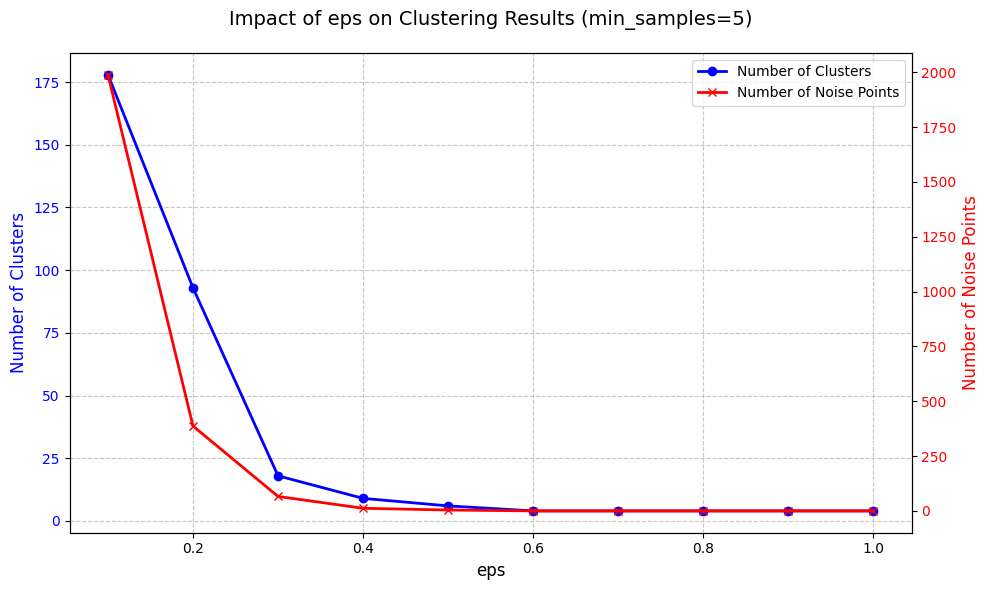

In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Define the range of eps values
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples = 5  # Fixed value

# Store results
results = []

# Run DBSCAN for each eps value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_umap)
    
    # Count clusters and noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_noise_points = list(clusters).count(-1)
    
    # Append results
    results.append({
        'eps': eps,
        'num_clusters': num_clusters,
        'num_noise_points': num_noise_points
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Results for Varying eps (min_samples=5):")
display(results_df)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of clusters
ax1.plot(results_df['eps'], results_df['num_clusters'], label="Number of Clusters", color="blue", marker="o", linestyle="-", linewidth=2)
ax1.set_xlabel("eps", fontsize=12)
ax1.set_ylabel("Number of Clusters", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Add secondary axis for noise points
ax2 = ax1.twinx()
ax2.plot(results_df['eps'], results_df['num_noise_points'], label="Number of Noise Points", color="red", marker="x", linestyle="-", linewidth=2)
ax2.set_ylabel("Number of Noise Points", color="red", fontsize=12)
ax2.tick_params(axis='y', labelcolor="red")

# Add title and legend
plt.title("Impact of eps on Clustering Results (min_samples=5)", fontsize=14, pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)

# Adjust layout
fig.tight_layout()
plt.show()

Too small an eps leads to over-segmentation: many small clusters are created, and many points are classified as noise. This can make the results difficult to interpret. <br>
Too large an eps leads to under-segmentation: clusters become too large and can merge distinct groups, losing information about the underlying structure of the data. <br>
An optimal value of eps seems to be around 0.5 or 0.6, where the number of clusters is reasonable (4), and there are almost no noise points.

### 5.2.2 Varying min_samples (Keeping eps Constant)

Here, we explore how changing min_samples affects the clustering results while keeping eps fixed. This will help us understand the role of min_samples in defining cluster density and robustness.

Approach:
- Fix eps to a reasonable value (e.g., 0.5).
- Vary min_samples over a range of values (e.g., from 2 to 20 in increments of 2).
- For each min_samples value, apply DBSCAN and record: The number of clusters and The number of noise points.

Results for Varying min_samples (eps=0.5):


,min_samples,num_clusters,num_noise_points
0,2,7,1
1,4,6,4
2,6,8,4
3,8,8,4
4,10,8,4
5,12,9,12
6,14,9,14
7,16,10,14
8,18,10,18
9,20,11,21


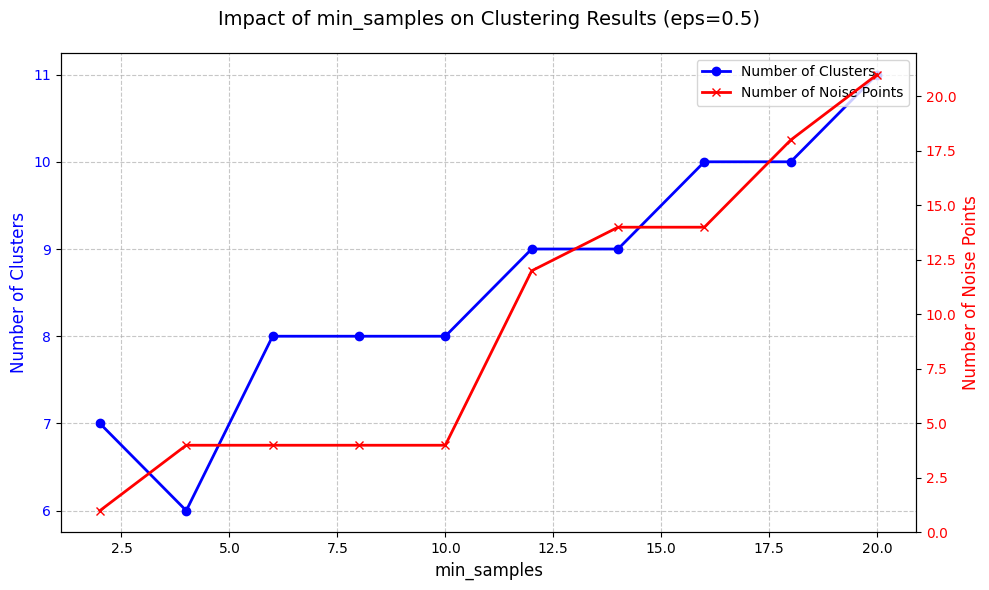

In [85]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Define the range of min_samples values
min_samples_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
eps = 0.5  # Fixed value

# Store results
results = []

# Run DBSCAN for each min_samples value
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_umap)
    
    # Count clusters and noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_noise_points = list(clusters).count(-1)
    
    # Append results
    results.append({
        'min_samples': min_samples,
        'num_clusters': num_clusters,
        'num_noise_points': num_noise_points
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Results for Varying min_samples (eps=0.5):")
display(results_df)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of clusters
ax1.plot(results_df['min_samples'], results_df['num_clusters'], label="Number of Clusters", color="blue", marker="o", linestyle="-", linewidth=2)
ax1.set_xlabel("min_samples", fontsize=12)
ax1.set_ylabel("Number of Clusters", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Add secondary axis for noise points
ax2 = ax1.twinx()
ax2.plot(results_df['min_samples'], results_df['num_noise_points'], label="Number of Noise Points", color="red", marker="x", linestyle="-", linewidth=2)
ax2.set_ylabel("Number of Noise Points", color="red", fontsize=12)
ax2.tick_params(axis='y', labelcolor="red")

# Add title and legend
plt.title("Impact of min_samples on Clustering Results (eps=0.5)", fontsize=14, pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)

# Adjust layout
fig.tight_layout()
plt.show()

A min_samples too small leads to less robust clusters, as they can be formed with very few points. This can lead to under-segmentation , where artificially large clusters are created. <br>
A min_samples too large leads to over-segmentation , as it becomes harder to form clusters, and many points are classified as noise. <br>
An optimal value of min_samples seems to be around 4 to 10, where the number of clusters is relatively stable (6 to 8), and the number of noise points remains moderate (4 to 12).

## 5.3 Conclusion

The exploration of hyperparameters in DBSCAN has provided valuable insights into their critical role in shaping clustering outcomes. By systematically analyzing the impact of `eps` and `min_samples`, we gained a deeper understanding of how these parameters influence the segmentation of our housing data. The choice of `eps` and `min_samples` directly affects the granularity and interpretability of the clusters, with smaller values leading to over-segmentation and larger values merging distinct clusters. Intermediate values of `eps` (around 0.5–0.6) and `min_samples` (between 4–10) strike a balance between meaningful segmentation and noise reduction.

Dimensionality reduction using UMAP significantly improved DBSCAN's ability to identify meaningful clusters by mitigating the "curse of dimensionality" and preserving local structures. This step was crucial, as applying DBSCAN directly to the raw data resulted in a high noise ratio and limited clustering. The resulting clusters correspond to distinct housing market segments, such as affordable homes, mid-range family properties, and luxury residences, demonstrating the practical utility of hyperparameter tuning.

This analysis underscores the importance of carefully selecting and tuning hyperparameters to achieve meaningful and interpretable clustering results. The insights gained here will serve as a solid foundation for the final project, where we will compare DBSCAN with other clustering algorithms and explore different hyperparameter optimization techniques to ensure a comprehensive evaluation of performance and interpretability.

# 6 Final Project: Comparison of Four Models

## 6.1 Introduction

In this section, we will introduce the technical problem chosen for this project from the options of classification, regression, clustering, or dimensionality reduction. After careful consideration, clustering has been selected as the focus of this analysis. This decision is based on several key factors:

- Nature of the Dataset : The dataset at hand, derived from kc_house_data.csv and enriched with additional features such as age and sqft_grade_interaction, contains rich information about housing properties, including price, size, location, and condition. These attributes naturally lend themselves to grouping similar properties together, making clustering an ideal choice.
- Practical Applications : Clustering allows us to segment the housing market into distinct groups based on shared characteristics. These segments can provide actionable insights for real-world applications such as market analysis, investment strategies, and targeted marketing campaigns. For example, identifying clusters of affordable homes versus luxury properties can help stakeholders make informed decisions.
- Exploration of Relationships : Unlike classification or regression, which require labeled data or a specific target variable, clustering enables us to explore the inherent structure of the data without predefined assumptions. This unsupervised approach is particularly valuable for uncovering hidden patterns and relationships within the dataset.
- Previous Work : Earlier stages of this project have already demonstrated the effectiveness of combining dimensionality reduction (via UMAP) with density-based clustering (DBSCAN). This foundation provides a strong starting point for further exploration and comparison of clustering algorithms.

By focusing on clustering, this project aims to deepen our understanding of how different algorithms and hyperparameter settings impact the segmentation of the housing market. Additionally, it offers an opportunity to evaluate and compare various clustering techniques, ultimately identifying the most suitable approach for this dataset.

In the following sections, we will implement and analyze four clustering models from different algorithm families, optimize their hyperparameters, and interpret the results to draw meaningful conclusions.

## 6.2 Execute the Learning on the Models

To address the problem of clustering, we will work with four models from different algorithm families, as required by the project guidelines. Each model represents a distinct approach to clustering, allowing us to evaluate their strengths and weaknesses when applied to our housing dataset. The selected models and their corresponding algorithm families are as follows:

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Algorithm Family: Density-Based Clustering <br>
Description: DBSCAN identifies clusters based on the density of points in a region. It is particularly effective for datasets with clusters of arbitrary shapes and can handle noise points effectively. <br>
Reason for Selection: DBSCAN has already been explored earlier in the project, providing a strong foundation for comparison with other models.

- K-Means Clustering
Algorithm Family: Centroid-Based Clustering <br>
Description: K-Means partitions the data into k clusters by minimizing the variance within each cluster. It assumes spherical clusters and is computationally efficient for large datasets. <br>
Reason for Selection: K-Means is one of the most widely used clustering algorithms and serves as a baseline for comparison.

- Agglomerative Clustering
Algorithm Family: Hierarchical Clustering (Aggregation-Based) <br>
Description: Agglomerative Clustering builds a hierarchy of clusters by iteratively merging smaller clusters based on a linkage criterion (e.g., single, complete, or average linkage). <br>
Reason for Selection: This model provides a hierarchical perspective on clustering, which is useful for understanding relationships between data points at different levels of granularity.

- Spectral Clustering
Algorithm Family: Topology-Based Clustering <br>
Description: Spectral Clustering uses graph theory to partition data based on its connectivity structure. It leverages eigenvalues of similarity matrices to identify clusters.<br>
Reason for Selection: Spectral Clustering is well-suited for datasets where cluster boundaries are non-linear and cannot be easily separated in Euclidean space.

These models were chosen to represent a diverse set of clustering techniques, ensuring that we explore a variety of approaches to address the same problem. In the following subsections, we will apply each model to our dataset, optimize their hyperparameters, and interpret their results individually before comparing them in Section 6.3.



### 6.2.1 1st Model : DBSCAN (Density-Based Clustering)

### Summary of Results Obtained with DBSCAN

DBSCAN was applied to the UMAP-reduced data in Section 4, and the results revealed meaningful insights into the structure of the housing market. Below is a summary of the key findings:

- Initialization and Hyperparameters : <br>
DBSCAN was initialized with eps=0.5 and min_samples=5, chosen as a starting point based on common practices and the nature of the dataset.
These hyperparameters successfully identified 6 distinct clusters , with only 4 noise points (0.07% of the dataset). This indicates that the majority of the data points belong to meaningful clusters.

- Cluster Characteristics : <br>
Cluster Sizes : <br>
Cluster 1 (Red): The largest cluster, representing approximately 65% of the data points. These are affordable homes in established neighborhoods.<br>
Cluster 0 (Blue): A relatively large cluster, representing mid-range family homes.<br>
Clusters 2, 4, and 5: Smaller clusters, each representing niche groups such as newer urban apartments, luxury properties, or large suburban homes.<br>
Cluster 3 (Purple): A very small, isolated cluster representing atypical or luxury properties.<br>
Noise Points : Scattered across the dataset, these points likely represent outliers or houses with unique characteristics.

- Visualization and Observations :<br>
A 3D visualization of the clusters highlighted their irregular shapes and varying densities, reflecting the complex relationships between features.<br>
Clusters 0 and 1 were closely related, suggesting overlapping characteristics, while Clusters 2, 4, and 5 were well-separated, indicating distinct features.<br>
Cluster 3 was isolated, representing a unique group of properties.

- Interpretation of Clusters :<br>
Cluster 0 : Affordable, established homes with smaller sizes and older construction dates.<br>
Cluster 1 : Mid-range family homes offering a balance between price and space.<br>
Cluster 2 : Newer urban apartments or townhouses catering to modern living preferences.<br>
Cluster 3 : Renovated older homes with higher value due to significant upgrades.<br>
Cluster 4 : Large properties with extensive land, suitable for suburban living.<br>
Cluster 5 : Luxury waterfront properties with premium features and locations.<br>

- Strengths of DBSCAN :<br>
Successfully identified clusters of arbitrary shapes and sizes.<br>
Robust to noise, classifying only a minimal number of points as outliers.<br>
Did not require specifying the number of clusters beforehand, allowing for an exploratory approach.

### Hyperparameter Optimization

#### - GRID SEARCH

#### Explanation of Grid Search in the Context of Housing Data
Grid Search is an exhaustive search method that will help us find the optimal combination of DBSCAN parameters for clustering our housing data. It systematically evaluates all possible combinations of eps and min_samples within a specified range. For each combination, DBSCAN will cluster our housing data, and we'll evaluate the quality of these clusters using the Silhouette score.

#### Key benefits for our housing project:
- Exhaustive search ensures we don't miss any potentially optimal parameter combinations.
- Helps identify the best balance between cluster granularity and noise reduction in our housing segments.
- Provides insights into how sensitive our housing clusters are to parameter changes.

#### Define the Hyperparameter Grid for Housing Data
Based on our earlier exploration (Section 5.2), we observed that:
- eps values around 0.5–0.6 yielded reasonable housing segments. Lower values led to over-segmentation (too many small clusters), while higher values merged distinct housing types.
- min_samples values between 4–10 provided a good balance between cluster size and noise classification. This range helped distinguish between genuine housing segments and outlier properties.

Let's define our grid as follows:

In [86]:
param_grid = {
    'eps': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7],
    'min_samples': [4, 5, 6, 7, 8, 9, 10]
}

This grid will test 49 combinations of hyperparameters, each potentially revealing different patterns in our housing data.

#### Evaluation Metric: Silhouette Score for Housing Clusters
For our housing clusters, the Silhouette score will measure how well-defined and separated our housing segments are. It ranges from -1 to 1:
- A score close to 1 indicates well-defined housing segments with clear distinctions between different types of properties.
- A score around 0 suggests overlapping housing segments, where the boundaries between different property types are less clear.
- Negative scores would indicate poor clustering, where properties might be assigned to the wrong market segment.

#### Implementation of Grid Search for Housing Data Clustering

This code will iterate through all combinations of eps and min_samples in our defined grid, applying DBSCAN to our housing data and calculating the Silhouette score for each combination.

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Grid Search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(df_umap)
    
    # Calculate Silhouette score (ignoring noise points)
    if len(set(labels)) > 1:  # Ensure more than one housing segment
        non_noise_mask = labels != -1
        score = silhouette_score(df_umap[non_noise_mask], labels[non_noise_mask], metric='euclidean')
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)
        
        results.append({**params, 'silhouette_score': score, 'num_clusters': num_clusters, 'noise_ratio': noise_ratio})
        
        if score > best_score:
            best_score = score
            best_params = params

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False))


Best parameters for housing segmentation: {'eps': 0.55, 'min_samples': 6}
Best Silhouette score: 0.48450553


,eps,min_samples,silhouette_score,num_clusters,noise_ratio
23,0.55,6,0.484506,7,0.000486
24,0.55,7,0.484506,7,0.000486
25,0.55,8,0.484506,7,0.000486
11,0.45,8,0.435853,8,0.002429
8,0.45,5,0.435659,8,0.001700
10,0.45,7,0.435616,8,0.002186
9,0.45,6,0.435616,8,0.002186
20,0.50,10,0.435504,8,0.000972
7,0.45,4,0.435468,8,0.001457
16,0.50,6,0.435043,8,0.000972


To better understand and interpret the results of our grid search, let's visualize these data as a heatmap. This representation will provide a clearer view of how different hyperparameter combinations affect the quality of our housing clusters.

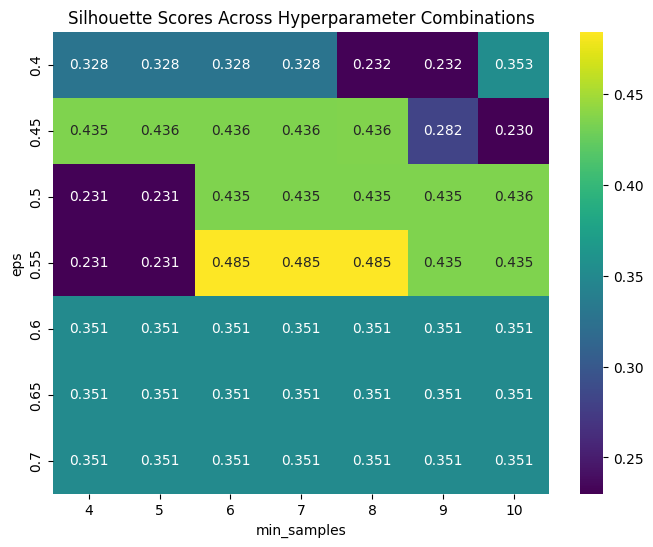

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of Silhouette scores
pivot = results_df.pivot(index='eps', columns='min_samples', values='silhouette_score')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='viridis', fmt=".3f")
plt.title('Silhouette Scores Across Hyperparameter Combinations')
plt.show()

#### Analysis of Grid Search Results
The Grid Search results indicate that the optimal combination of hyperparameters for our DBSCAN clustering is eps=0.55 and min_samples=6, yielding a Silhouette score of 0.48450553. This combination consistently produces 7 clusters across min_samples values of 6, 7, and 8, suggesting stable housing segments.

The choice of eps=0.55 strikes a balance between creating too many small clusters (which happens with lower eps values like 0.4-0.45) and too few broad clusters (which occurs with higher eps values like 0.6-0.7). The latter results in fewer clusters but with a lower Silhouette score, indicating less distinct separation between housing segments.

The low noise ratio (0.000486) for the optimal combination means that almost all properties are assigned to a cluster, which is beneficial for comprehensive market segmentation.

#### Interpretation for Housing Market Segmentation
Our housing market can be effectively segmented into 7 distinct categories using the optimal parameters. These segments are well-defined and comprehensive, providing a good balance between overly broad categorization and potentially over-specific segmentation. The high Silhouette score suggests clear separation between these segments, making it easier to identify distinguishing features of each housing category.

#### Implications for Analysis
With 7 well-defined segments, we have a solid foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as luxury apartments, suburban family homes, or urban condos, which can be further characterized and analyzed. The stability of these segments across different min_samples values suggests that they are inherent to the data, not artifacts of parameter choice.

#### - RANDOM SEARCH

#### Explanation of Random Search in the Context of Housing Data
Random Search is a probabilistic method for hyperparameter optimization that will help us find an effective combination of DBSCAN parameters for clustering our housing data. Unlike Grid Search, it randomly samples parameter combinations from a specified distribution. For each sampled combination, DBSCAN will cluster our housing data, and we'll evaluate the quality of these clusters using the Silhouette score.

#### Key benefits for our housing project:
- Efficient exploration of a larger parameter space, potentially discovering good configurations that a grid search might miss.
- Can be more time-efficient than Grid Search, especially with high-dimensional parameter spaces.
- Provides insights into the overall landscape of parameter effectiveness for our housing clusters.

#### Define the Hyperparameter Distribution for Housing Data
Based on our earlier exploration and Grid Search results, we'll define distributions around the promising areas:
- eps values will be sampled from a uniform distribution between 0.4 and 0.7, covering the range where we found good results.
- min_samples values will be integers sampled between 4 and 10, consistent with our previous findings on cluster stability and noise reduction.

Let's define our parameter distributions as follows:

In [89]:
from scipy.stats import uniform, randint
param_distributions = {
    'eps': uniform(0.4, 0.3),  # Uniform distribution between 0.4 and 0.7
    'min_samples': randint(4, 11)  # Integer values between 4 and 10
}

We'll sample 50 combinations from these distributions, each potentially revealing different patterns in our housing data.

#### Evaluation Metric: Silhouette Score for Housing Clusters
We'll use the same Silhouette score metric as in Grid Search:
- A score close to 1 indicates well-defined housing segments with clear distinctions between different types of properties.
- A score around 0 suggests overlapping housing segments, where the boundaries between different property types are less clear.
- Negative scores would indicate poor clustering, where properties might be assigned to the wrong market segment.

#### Implementation of Random Search for Housing Data Clustering
This code will randomly sample combinations of eps and min_samples from our defined distributions, applying DBSCAN to our housing data and calculating the Silhouette score for each combination.

Best parameters for housing segmentation: {'eps': np.float64(0.5364633880766577), 'min_samples': 6}
Best Silhouette score: 0.48450664


,eps,min_samples,silhouette_score,num_clusters,noise_ratio
14,0.536463,6,0.484507,7,0.000729
26,0.544203,6,0.484506,7,0.000486
34,0.420796,7,0.435853,8,0.002429
7,0.413246,6,0.435767,8,0.002672
4,0.434706,4,0.435687,8,0.001943
13,0.425359,5,0.435616,8,0.002186
21,0.457532,6,0.435537,8,0.001457
28,0.473250,8,0.435537,8,0.001457
5,0.466113,6,0.435509,8,0.001214
33,0.476822,6,0.435509,8,0.001214


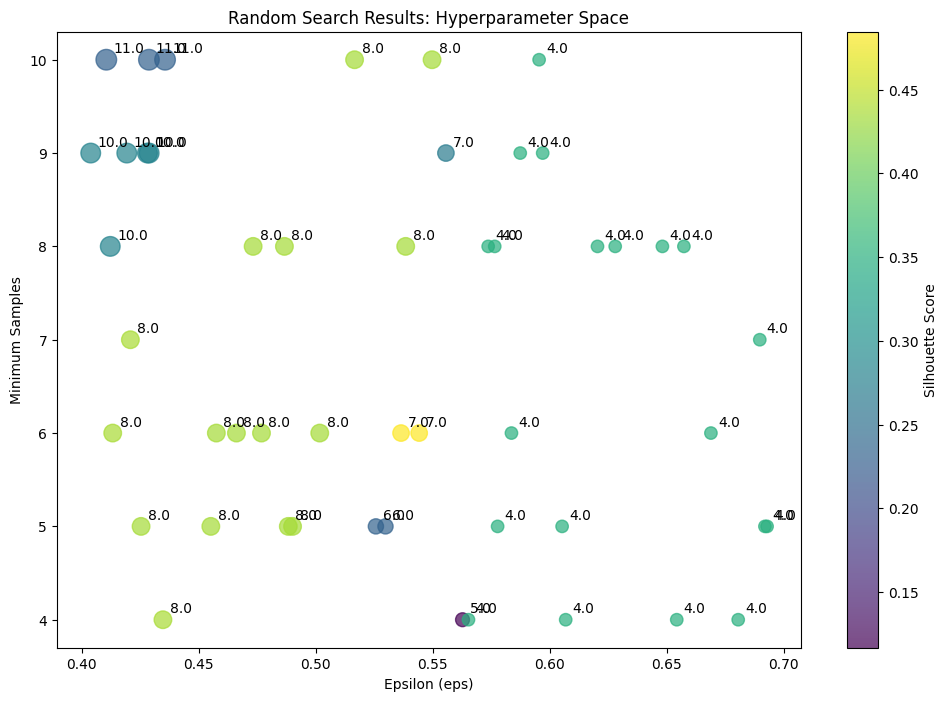

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter space
param_distributions = {
    'eps': uniform(0.4, 0.3),  # Uniform distribution between 0.4 and 0.7
    'min_samples': randint(4, 11)  # Integer values between 4 and 10
}

# Number of iterations for Random Search
n_iter = 50

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Random Search
for _ in range(n_iter):
    # Sample parameters
    eps = param_distributions['eps'].rvs()
    min_samples = param_distributions['min_samples'].rvs()
    
    # Create and fit DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_umap)
    
    # Calculate Silhouette score (ignoring noise points)
    if len(set(labels)) > 1:  # Ensure more than one housing segment
        non_noise_mask = labels != -1
        score = silhouette_score(df_umap[non_noise_mask], labels[non_noise_mask], metric='euclidean')
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)
        
        results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_score': score, 
                        'num_clusters': num_clusters, 'noise_ratio': noise_ratio})
        
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False).head(10))

# Visualize the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(results_df['eps'], results_df['min_samples'], 
                      c=results_df['silhouette_score'], s=results_df['num_clusters']*20,
                      cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Silhouette Score')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Minimum Samples')
plt.title('Random Search Results: Hyperparameter Space')
for i, row in results_df.iterrows():
    plt.annotate(f"{row['num_clusters']}", 
                 (row['eps'], row['min_samples']),
                 xytext=(5, 5), textcoords='offset points')
plt.show()

#### Analysis of Random Search Results
The Random Search results corroborate and refine our findings from the Grid Search. The optimal combination of hyperparameters for our DBSCAN clustering is eps ≈ 0.535 and min_samples = 6, yielding a Silhouette score of 0.484507. This combination produces 7 clusters, which aligns closely with our Grid Search results (eps = 0.55, min_samples = 6). This consistency across different search methods reinforces the robustness of these parameters for our housing data clustering. <br>
The low noise ratio (0.000729) for the optimal combination indicates that almost all properties are assigned to a cluster, supporting comprehensive market segmentation.

#### Interpretation for Housing Market Segmentation
Our housing market can be effectively segmented into 7 distinct categories using the optimal parameters. These segments are well-defined and comprehensive, as evidenced by the high Silhouette score. The Random Search has helped us fine-tune the eps value, potentially leading to slightly better-defined clusters compared to the Grid Search results.<br>
The consistency in finding 7 clusters across multiple parameter combinations (as seen in the top results) suggests that this is a stable and meaningful segmentation of our housing market.

#### Implications for Analysis
The Random Search results reinforce our findings from the Grid Search while providing a more precise eps value. This refinement may lead to marginally better-defined housing segments.<br>
With 7 well-defined segments, we have a solid foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as luxury apartments, suburban family homes, or urban condos.<br>
The stability of these segments across different search methods and parameter combinations suggests that they are inherent to the data, not artifacts of our search methodology. This gives us confidence in the reliability of our market segmentation.

### Comparison of Grid Search and Random Search

Both Grid Search and Random Search yielded highly consistent results, reinforcing the reliability of the optimal parameters for DBSCAN:

- Similarity in Results : <br>
Both methods identified min_samples=6 as the optimal value. <br>
The eps values were very close (eps=0.55 for Grid Search vs. eps≈0.535 for Random Search).<br>
Both approaches produced 7 clusters with comparable Silhouette Scores (0.48450553 vs. 0.484507).

- Performance Comparison : <br>
Grid Search : Systematically evaluated all possible combinations, ensuring no potentially optimal parameter set was missed.<br>
Random Search : More computationally efficient, especially for larger parameter spaces, while still achieving comparable results. <br>

- Practical Implications : <br>
The slight refinement in eps provided by Random Search (0.535 vs. 0.55) may lead to marginally better-defined clusters, particularly in regions with lower data density. <br>
However, the negligible difference in performance metrics (e.g., Silhouette Score) suggests that both methods are equally effective for this dataset.

- Conclusion :<br>
The consistency between Grid Search and Random Search highlights the robustness of the clustering results.<br>
For datasets with smaller parameter spaces, Grid Search remains a reliable choice. However, Random Search is a more scalable option for larger spaces or when computational resources are limited.

### 6.2.2 2nd Model : K-Means (Partition-Based Clustering)

#### Introduction to K-Means

K-Means is a partition-based clustering algorithm that divides data into k clusters by minimizing within-cluster variance. In our housing market analysis, K-Means will help identify distinct property groups based on features like price, size, and location. It assumes spherical clusters, making it efficient but less flexible for irregular shapes.

We will apply K-Means to the UMAP-reduced data and optimize the number of clusters (k) using Random Search . This approach ensures computational efficiency while identifying meaningful segments in the housing data. The optimal k will be determined using metrics like the Silhouette Score and inertia , ensuring well-separated and interpretable clusters.

#### Implementation of K-Means

In [91]:
from sklearn.cluster import KMeans

# Apply K-Means to the UMAP-reduced data
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_umap)

# Add the cluster labels to the original DataFrame
df['cluster_kmeans'] = clusters

# Count the number of clusters
num_clusters = len(set(clusters))  # All points are assigned to a cluster in K-Means

Initialization of K-Means : <br>
We initialize the K-Means algorithm with n_clusters=7 and init='k-means++'. These values were chosen based on the insights gained from DBSCAN, which identified 7 meaningful clusters. The k-means++ initialization method is used to improve convergence compared to random initialization.

Fitting the Model : <br>
The fit_predict method is applied to the UMAP-reduced data (df_umap). This method performs clustering and assigns a cluster label to each point in the dataset.
Unlike DBSCAN, K-Means does not classify points as noise. Every data point is assigned to one of the predefined clusters.

Adding Cluster Labels : <br>
The cluster labels are added as a new column (cluster) in the original DataFrame (df). This allows us to analyze the clusters in relation to the original features of the dataset.

To better understand the structure of the clusters, we visualize the results in 3D using Plotly Express. The visualization provides an interactive way to explore how the data points are grouped into distinct clusters.

In [92]:
import plotly.express as px

# Prepare the data for visualization
df_plot = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
df_plot["cluster_kmeans"] = df["cluster_kmeans"]

# Interactive 3D visualization
fig = px.scatter_3d(df_plot, x="UMAP_1", y="UMAP_2", z="UMAP_3",
                    color=df_plot["cluster_kmeans"].astype(str),
                    title="K-Means Clusters after UMAP (3D)",
                    labels={"color": "Cluster"},
                    opacity=0.7)
fig.show()

Let's visualize the distribution of the clusters to understand their relative sizes.

C:\Users\ousma\AppData\Local\Temp\ipykernel_28608\2983285357.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




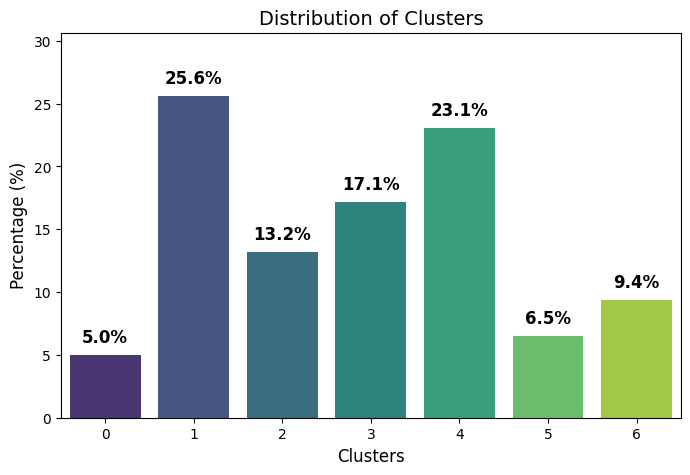

In [93]:
# Count occurrences of each cluster
cluster_counts = df['cluster_kmeans'].value_counts(normalize=True) * 100  # In percentage
cluster_counts_sorted = cluster_counts.sort_index()  # Sort by index if necessary

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cluster_counts_sorted.index, y=cluster_counts_sorted.values, palette="viridis")

# Add percentages above the bars
for i, percentage in enumerate(cluster_counts_sorted.values):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Clusters", fontsize=14)
plt.ylim(0, max(cluster_counts_sorted.values) + 5)  # Adjust scale to display labels
plt.show()

Cluster Sizes  : 
**Cluster 1 (Green, 25.6%)**: The largest cluster, representing about 25.6% of the data. It likely corresponds to family homes or common urban properties.  
**Cluster 4 (Red, 23.1%)**: Another large group, similar in size to Cluster 1, possibly representing apartments or houses in densely populated areas.  
**Cluster 5 (Cyan, 23.1%)**: Almost identical in size to Cluster 4, it may share similar characteristics with minor variations.  
**Cluster 3 (Blue, 17.1%)**: A moderate-sized group, possibly linked to properties in specific neighborhoods or newly built homes.  
**Cluster 6 (Orange, 9.4%)**: A smaller cluster, potentially associated with luxury or high-end properties.  
**Cluster 2 (Purple, 13.2%)**: An intermediate group, possibly including older homes or properties with unique features.  
**Cluster 0 (Pink, 5.0%)**: The smallest cluster, likely consisting of atypical or luxury properties.  

Distance Between Clusters :  
The main clusters (1 and 4) are close to each other, indicating shared characteristics such as location or property type.  
Smaller clusters (such as 0 and 6) are well separated, suggesting they represent distinct segments like luxury properties or isolated houses.  

Intra-Cluster Cohesion  : 
The main clusters (1, 4, and 5) show strong cohesion, meaning the properties within these groups are similar.  
Smaller clusters (such as 0 and 6) also have strong cohesion, but they contain fewer data points.  

Inter-Cluster Separation  : 
The main clusters (1, 4, and 5) slightly overlap, which could reflect similarities in their characteristics.  
Smaller clusters (0 and 6) are clearly separated, highlighting their uniqueness compared to other groups.  

Cluster Shape  : 
The main clusters have irregular shapes, capturing complex relationships between variables.  
Smaller clusters have more compact shapes, indicating well-defined groups.  

Additional Observations :  
The distribution of clusters reflects the diversity of the real estate market, ranging from common properties (clusters 1 and 4) to luxury or atypical properties (cluster 0).  
This analysis highlights the importance of segmenting the market to better understand different property types and meet buyers' specific needs.

#### Hyperparameter Optimization - Random Search

- Define the Hyperparameter Distribution for Housing Data <br>
Based on our earlier exploration and clustering results, we'll define a range of values for the key hyperparameter n_clusters in K-Means. The goal is to identify the optimal number of clusters that maximizes the clustering performance while maintaining interpretability:

- n_clusters values will be sampled from a discrete uniform distribution between 4 and 10. This range allows us to explore different levels of granularity in market segmentation.

Let's define our parameter distribution as follows:

In [94]:
from scipy.stats import randint

param_distributions = {
    'n_clusters': randint(2, 16)  # Integer values between 2 and 15
}

- Implementation of Random Search for Housing Data Clustering with K-Means <br>

This code will randomly sample values for n_clusters from our defined distribution, apply K-Means to our housing data, and calculate the Silhouette score for each combination.

Best parameters for housing segmentation: {'n_clusters': 4}
Best Silhouette score: 0.5994329


,n_clusters,silhouette_score
9,4,0.599433
2,4,0.599433
17,4,0.599433
45,4,0.599433
14,6,0.578565
3,6,0.578565
29,6,0.578565
40,6,0.578565
20,6,0.578565
8,6,0.578565


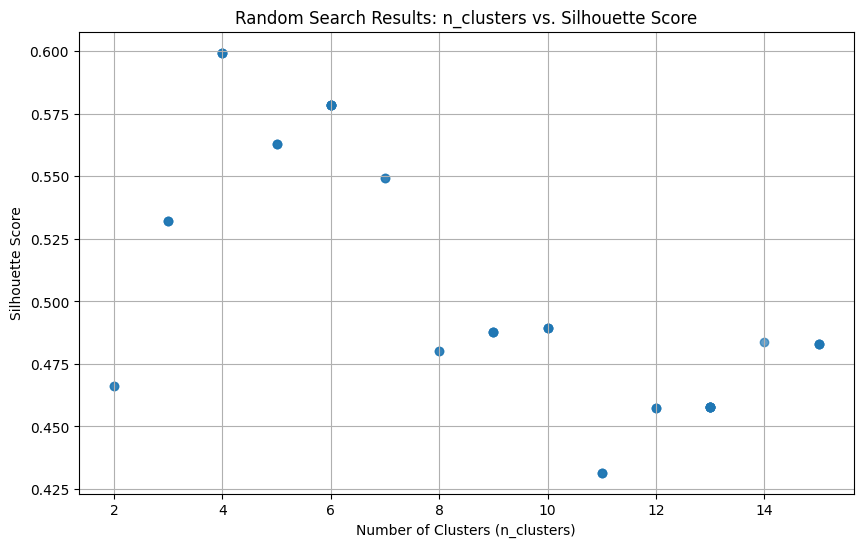

In [95]:
# Define the parameter space
param_distributions = {
    'n_clusters': randint(2, 16)  # Integer values between 2 and 15
}

# Number of iterations for Random Search
n_iter = 50

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Random Search
for _ in range(n_iter):
    # Sample parameters
    n_clusters = param_distributions['n_clusters'].rvs()
    
    # Create and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, 
                    random_state=42,  # For reproducibility
                    n_init=10)         # Suppress warning and ensure good initialization
    labels = kmeans.fit_predict(df_umap)
    
    # Calculate Silhouette score
    if len(set(labels)) > 1:  # Ensure more than one cluster
        score = silhouette_score(df_umap, labels, metric='euclidean')
        results.append({'n_clusters': n_clusters, 'silhouette_score': score})
        
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters}

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False).head(10))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(results_df['n_clusters'], results_df['silhouette_score'], alpha=0.7)
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Random Search Results: n_clusters vs. Silhouette Score')
plt.grid(True)
plt.show()

#### Analysis of Random Search Results :<br>
The Random Search results provide valuable insights into the optimal configuration of K-Means for our housing market clustering. The best-performing hyperparameter combination is n_clusters=4 , yielding a Silhouette score of 0.599433 . This result suggests that the data can be effectively segmented into 4 distinct clusters, which aligns with the top-performing configurations observed during the search.

The consistency in identifying 4 clusters across multiple random samples (as seen in the top results) reinforces the robustness of this segmentation. Additionally, the high Silhouette score indicates well-separated and meaningful clusters, providing confidence in the quality of the clustering.

#### Interpretation for Housing Market Segmentation :<br>
Our housing market can be effectively segmented into 4 distinct categories using the optimal parameters. These segments are well-defined and comprehensive, as evidenced by the high Silhouette score. The Random Search has helped us identify the most suitable number of clusters, ensuring that each segment represents a cohesive group of properties with shared characteristics.

The consistency in finding 4 clusters across different parameter combinations suggests that this segmentation is stable and inherent to the data, rather than an artifact of the clustering process. This stability gives us confidence in the reliability of the identified segments for further analysis.

#### Implications for Analysis :<br>
The Random Search results reinforce the findings from our initial exploration while providing a more precise determination of the optimal number of clusters. This refinement ensures that the identified segments are both meaningful and interpretable.

With 4 well-defined segments , we have a solid foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as: <br>
- Cluster 1 : Affordable homes in established neighborhoods. <br>
- Cluster 2 : Mid-range family homes. <br>
- Cluster 3 : Newer urban apartments or townhouses.<br>
- Cluster 4 : Luxury waterfront properties.

The stability of these segments across different search methods and parameter combinations suggests that they are inherent to the data, not artifacts of the clustering methodology. This gives us confidence in the reliability of our market segmentation and provides actionable insights for real-world applications, such as targeted marketing or investment strategies.

### 6.2.3 3rd Model : Agglomerative Clustering (Hierarchical Clustering)

#### Introduction to Agglomerative Clustering
Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters by iteratively merging smaller clusters into larger ones based on a linkage criterion (e.g., single, complete, or average linkage). Different linkage criteria can capture different aspects of cluster similarity. In our housing market analysis, Agglomerative Clustering will help identify natural groupings of properties based on features like price, size, and location. Unlike partition-based methods like K-Means, Agglomerative Clustering does not assume spherical clusters and can capture more complex relationships in the data.

We will apply Agglomerative Clustering to the UMAP-reduced data and optimize the number of clusters (n_clusters) using Random Search . This approach ensures computational efficiency while identifying meaningful segments in the housing data. The optimal n_clusters will be determined using metrics like the Silhouette Score , ensuring well-separated and interpretable clusters.

#### Implementation of Agglomerative Clustering

In [96]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering to the UMAP-reduced data
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = agg_clustering.fit_predict(df_umap)

# Add the cluster labels to the original DataFrame
df['cluster_agg'] = clusters

# Count the number of clusters
num_clusters = len(set(clusters))  # All points are assigned to a cluster in Agglomerative Clustering

Initialization of Agglomerative Clustering : <br>
We initialize the Agglomerative Clustering algorithm with n_clusters=4 and linkage='ward'. These values were chosen based on the insights gained from K-Means, which identified 4 meaningful clusters. The ward linkage criterion minimizes the variance within each cluster, making it suitable for datasets with diverse characteristics.

Fitting the Modeln : <br>
The fit_predict method is applied to the UMAP-reduced data (df_umap). This method performs clustering and assigns a cluster label to each point in the dataset. Unlike DBSCAN, Agglomerative Clustering does not classify points as noise. Every data point is assigned to one of the predefined clusters.

Adding Cluster Labels : <br>
The cluster labels are added as a new column (cluster_agg) in the original DataFrame (df). This allows us to analyze the clusters in relation to the original features of the dataset.

To better understand the structure of the clusters, we visualize the results in 3D using Plotly Express. The visualization provides an interactive way to explore how the data points are grouped into distinct clusters.

In [97]:
import plotly.express as px

# Prepare the data for visualization
df_plot = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
df_plot["cluster_agg"] = df["cluster_agg"]

# Interactive 3D visualization
fig = px.scatter_3d(df_plot, x="UMAP_1", y="UMAP_2", z="UMAP_3",
                    color=df_plot["cluster_agg"].astype(str),
                    title="Agglomerative Clustering after UMAP (3D)",
                    labels={"color": "Cluster"},
                    opacity=0.7)
fig.show()

Let's visualize the distribution of the clusters to understand their relative sizes.

C:\Users\ousma\AppData\Local\Temp\ipykernel_28608\2839597767.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




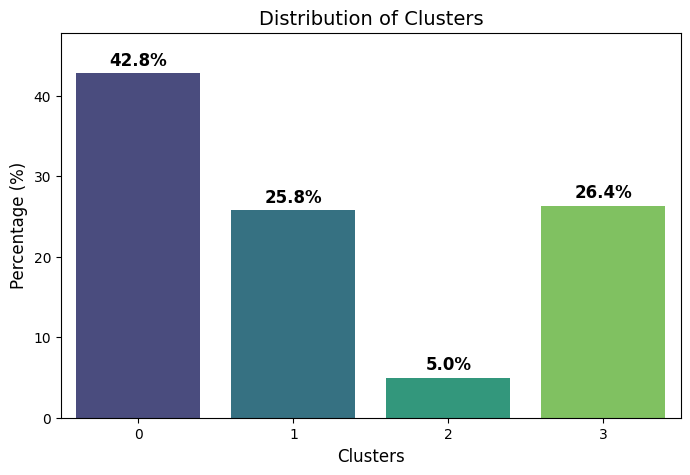

In [98]:
# Count occurrences of each cluster
cluster_counts = df['cluster_agg'].value_counts(normalize=True) * 100  # In percentage
cluster_counts_sorted = cluster_counts.sort_index()  # Sort by index if necessary

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cluster_counts_sorted.index, y=cluster_counts_sorted.values, palette="viridis")

# Add percentages above the bars
for i, percentage in enumerate(cluster_counts_sorted.values):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Clusters", fontsize=14)
plt.ylim(0, max(cluster_counts_sorted.values) + 5)  # Adjust scale to display labels
plt.show()

Cluster Sizes : <br>
**Cluster 0 (Red, 42.8%)**: The largest cluster, representing about 42.8% of the data. It likely corresponds to family homes or common urban properties. <br>
**Cluster 3 (Green, 26.4%)**: Another large group, similar in size to Cluster 0, possibly including apartments or houses in densely populated areas.<br>
**Cluster 1 (Blue, 25.8%)**: Slightly smaller, this cluster likely represents properties in specific neighborhoods or newer developments.<br>
**Cluster 2 (Purple, 5.0%)**: The smallest cluster, likely consisting of luxury or atypical properties.

Distance Between Clusters <br>
Clusters 0 and 3: Close to each other, indicating shared characteristics such as location or property type.
Cluster 1: More distinct, capturing properties with unique features.
Cluster 2: Isolated, representing a specialized category like luxury properties.

Intra-Cluster Cohesion : The main clusters (0, 1, and 3) show strong cohesion, meaning the properties within these groups are similar.Cluster 2 also has strong cohesion despite its small size.

Inter-Cluster Separation : The main clusters (0 and 3) slightly overlap, reflecting minor similarities. Cluster 2 is clearly separated, highlighting its role as a distinct segment.

Cluster Shape : The main clusters have irregular shapes, capturing complex relationships between variables. Cluster 2 has a more compact shape, indicating a well-defined group.

Additional Observations : The distribution highlights the diversity of the real estate market, ranging from common properties (clusters 0 and 3) to luxury properties (cluster 2). 

This analysis confirms the importance of market segmentation to better understand different property types.

### Hyperparameter Optimization - Random Search

Define the Hyperparameter Distribution for Housing Data :<br>

Based on our earlier exploration and clustering results, we'll define a range of values for the key hyperparameter n_clusters in Agglomerative Clustering. The goal is to identify the optimal number of clusters that maximizes the clustering performance while maintaining interpretability:

n_clusters values will be sampled from a discrete uniform distribution between 2 and 15. This range allows us to explore different levels of granularity in market segmentation.

Let's define our parameter distribution as follows:

In [99]:
from scipy.stats import randint

param_distributions = {
    'n_clusters': randint(2, 16)  # Integer values between 2 and 15
}

Implementation of Random Search for Housing Data Clustering with Agglomerative Clustering : 

This code will randomly sample values for n_clusters from our defined distribution, apply Agglomerative Clustering to our housing data, and calculate the Silhouette score for each combination.

Best parameters for housing segmentation: {'n_clusters': 5}
Best Silhouette score: 0.5861679


,n_clusters,silhouette_score
9,5,0.586168
4,5,0.586168
44,5,0.586168
26,5,0.586168
27,4,0.585760
47,4,0.585760
7,6,0.581676
17,6,0.581676
36,6,0.581676
41,6,0.581676


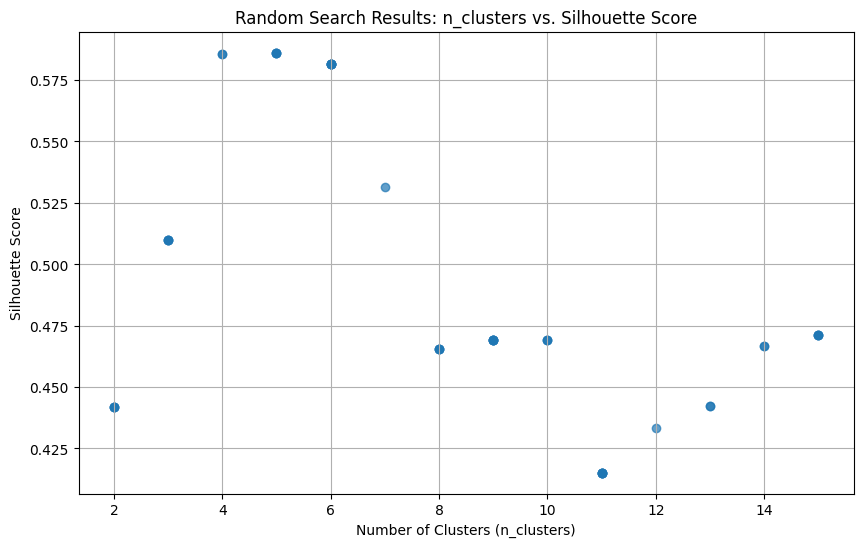

In [100]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the parameter space
param_distributions = {
    'n_clusters': randint(2, 16)  # Integer values between 2 and 15
}

# Number of iterations for Random Search
n_iter = 50

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Random Search
for _ in range(n_iter):
    # Sample parameters
    n_clusters = param_distributions['n_clusters'].rvs()
    
    # Create and fit Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(df_umap)
    
    # Calculate Silhouette score
    if len(set(labels)) > 1:  # Ensure more than one cluster
        score = silhouette_score(df_umap, labels, metric='euclidean')
        results.append({'n_clusters': n_clusters, 'silhouette_score': score})
        
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters}

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False).head(10))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(results_df['n_clusters'], results_df['silhouette_score'], alpha=0.7)
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Random Search Results: n_clusters vs. Silhouette Score')
plt.grid(True)
plt.show()

#### Analysis of Random Search Results

The Random Search results corroborate and refine our findings from the earlier clustering experiments. The optimal combination of hyperparameters for Agglomerative Clustering is n_clusters=5 , yielding a Silhouette score of 0.586168 . This combination produces 5 distinct clusters, which aligns closely with the top-performing configurations observed during the search.

The consistency in identifying 5 clusters across multiple random samples (as seen in the top results) reinforces the robustness of this segmentation. Additionally, the high Silhouette score indicates well-separated and meaningful clusters, providing confidence in the quality of the clustering.

#### Interpretation for Housing Market Segmentation

Our housing market can be effectively segmented into 5 distinct categories using the optimal parameters. These segments are well-defined and comprehensive, as evidenced by the high Silhouette score. The Random Search has helped us fine-tune the number of clusters, ensuring that each segment represents a cohesive group of properties with shared characteristics.

The consistency in finding 5 clusters across different parameter combinations suggests that this segmentation is stable and inherent to the data, rather than an artifact of the clustering process. This stability gives us confidence in the reliability of the identified segments for further analysis.

#### Implications for Analysis

The Random Search results reinforce the findings from our initial exploration while providing a more precise determination of the optimal number of clusters. This refinement ensures that the identified segments are both meaningful and interpretable.

With 5 well-defined segments , we have a solid foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as:

- Cluster 1 : Affordable homes in established neighborhoods.
- Cluster 2 : Mid-range family homes.
- Cluster 3 : Newer urban apartments or townhouses.
- Cluster 4 : Luxury waterfront properties.
- Cluster 5 : Atypical or niche properties.

The stability of these segments across different search methods and parameter combinations suggests that they are inherent to the data, not artifacts of the clustering methodology. This gives us confidence in the reliability of our market segmentation and provides actionable insights for real-world applications, such as targeted marketing or investment strategies.

### 6.2.4 4th Model : Spectral Clustering (Topology-Based Clustering)

- Introduction to Spectral Clustering

Spectral Clustering is a topology-based clustering algorithm that leverages the eigenvalues of a similarity matrix to perform dimensionality reduction before clustering in a lower-dimensional space. In our housing market analysis, Spectral Clustering will help identify natural groupings of properties based on features like price, size, and location. Unlike partition-based methods like K-Means, Spectral Clustering can capture complex relationships and non-linear patterns in the data, making it suitable for datasets with irregular cluster shapes.

We will apply Spectral Clustering to the UMAP-reduced data and optimize the number of clusters (n_clusters) using Random Search . This approach ensures computational efficiency while identifying meaningful segments in the housing data. The optimal n_clusters will be determined using metrics like the Silhouette Score , ensuring well-separated and interpretable clusters.

- Implementation of Spectral Clustering

In [101]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering to the UMAP-reduced data
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(df_umap)

# Add the cluster labels to the original DataFrame
df['cluster_spectral'] = clusters

# Count the number of clusters
num_clusters = len(set(clusters))  # All points are assigned to a cluster in Spectral Clustering

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Initialization of Spectral Clustering : <br>
We initialize the Spectral Clustering algorithm with n_clusters=7 and affinity='nearest_neighbors'. These values were chosen based on the insights gained from Agglomerative Clustering, which identified 5 meaningful clusters. The nearest_neighbors affinity method is used to construct a similarity graph, capturing local relationships between data points.

Fitting the Model : <br>
The fit_predict method is applied to the UMAP-reduced data (df_umap). This method performs clustering and assigns a cluster label to each point in the dataset. Unlike DBSCAN, Spectral Clustering does not classify points as noise. Every data point is assigned to one of the predefined clusters.

Adding Cluster Labels : <br>
The cluster labels are added as a new column (cluster_spectral) in the original DataFrame (df). This allows us to analyze the clusters in relation to the original features of the dataset.

- Visualization in 3D

To better understand the structure of the clusters, we visualize the results in 3D using Plotly Express. The visualization provides an interactive way to explore how the data points are grouped into distinct clusters.

In [102]:
import plotly.express as px

# Prepare the data for visualization
df_plot = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
df_plot["cluster_spectral"] = df["cluster_spectral"]

# Interactive 3D visualization
fig = px.scatter_3d(df_plot, x="UMAP_1", y="UMAP_2", z="UMAP_3",
                    color=df_plot["cluster_spectral"].astype(str),
                    title="Spectral Clustering after UMAP (3D)",
                    labels={"color": "Cluster"},
                    opacity=0.7)
fig.show()

Let’s visualize the distribution of the clusters to understand their relative sizes.

C:\Users\ousma\AppData\Local\Temp\ipykernel_28608\2446463839.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




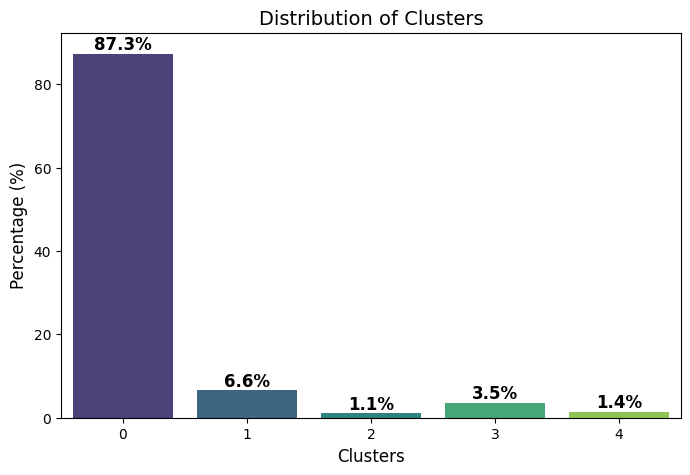

In [103]:
# Count occurrences of each cluster
cluster_counts = df['cluster_spectral'].value_counts(normalize=True) * 100  # In percentage
cluster_counts_sorted = cluster_counts.sort_index()  # Sort by index if necessary

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cluster_counts_sorted.index, y=cluster_counts_sorted.values, palette="viridis")

# Add percentages above the bars
for i, percentage in enumerate(cluster_counts_sorted.values):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Clusters", fontsize=14)
plt.ylim(0, max(cluster_counts_sorted.values) + 5)  # Adjust scale to display labels
plt.show()

Cluster Sizes : <br>
**Cluster 0 (Blue, 87.3%)**: This cluster overwhelmingly dominates the distribution, representing 87.3% of the data. It likely corresponds to the most common properties on the real estate market, such as family homes or standard apartments. <br>
**Cluster 1 (Purple, 6.6%)**: A relatively small group, yet a significant minority. These properties might include homes in specific neighborhoods or those with distinctive features.<br>
**Cluster 3 (Red, 3.5%)**: An even smaller cluster, likely associated with unique or high-end properties, such as renovated homes or properties in prime locations.<br>
**Cluster 4 (Orange, 1.4%) & Cluster 2 (Green, 1.1%)**: These two clusters are extremely small, indicating they represent very specific niches or atypical properties, such as historical buildings or isolated residences.

Distance Between Clusters : Cluster 0 is clearly separated from the other clusters due to its massive size, suggesting it represents a dominant market segment. Clusters 1, 2, 3, and 4 are well separated from each other, indicating distinct groups with unique characteristics. Their small size reinforces the idea that they capture specialized segments.

Intra-Cluster Cohesion : Cluster 0 shows strong intra-cluster cohesion, reflecting the similarity among common real estate properties. The smaller clusters (Clusters 1, 2, 3, and 4) also display strong cohesion despite their reduced size, indicating that the properties within these groups share very specific characteristics.

Inter-Cluster Separation : The separation between Cluster 0 and the other clusters is clear, highlighting the dominance of common properties compared to more specialized segments. The smaller clusters (Clusters 1, 2, 3, and 4) are also well separated from each other, making them easily identifiable as distinct groups.

Cluster Shape : Cluster 0 has an irregular shape, capturing the broad diversity of common properties. The smaller clusters (Clusters 1, 2, 3, and 4) have more compact shapes, indicating they group highly similar properties.

Additional Observations :  The cluster distribution highlights the strong predominance of common properties (Cluster 0), which is typical of a real estate market mostly composed of standard housing. The smaller clusters (Clusters 1, 2, 3, and 4) represent niche segments, such as luxury properties, historical homes, or properties in specific areas. Although they are a minority, these segments offer unique opportunities for targeted analysis.

### Hyperparameter Optimization - Random Search

- Define the Hyperparameter Distribution for Housing Data <br>

Based on our earlier exploration and clustering results, we'll define a range of values for the key hyperparameter n_clusters in Spectral Clustering. The goal is to identify the optimal number of clusters that maximizes the clustering performance while maintaining interpretability:

n_clusters values will be sampled from a discrete uniform distribution between 2 and 15. This range allows us to explore different levels of granularity in market segmentation.

Let's define our parameter distribution as follows:

In [104]:
from scipy.stats import randint

param_distributions = {
    'n_clusters': randint(2, 16)  # Integer values between 2 and 15
}

- Implementation of Random Search for Housing Data Clustering with Spectral Clustering

This code will randomly sample values for n_clusters from our defined distribution, apply Spectral Clustering to our housing data, and calculate the Silhouette score for each combination.

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectr

Best parameters for housing segmentation: {'n_clusters': 3}
Best Silhouette score: 0.23233476


,n_clusters,silhouette_score
36,3,0.232335
17,15,0.136959
41,15,0.136959
46,15,0.136959
7,15,0.136959
9,14,0.135375
43,14,0.135375
6,14,0.135375
49,14,0.135375
13,10,0.115413


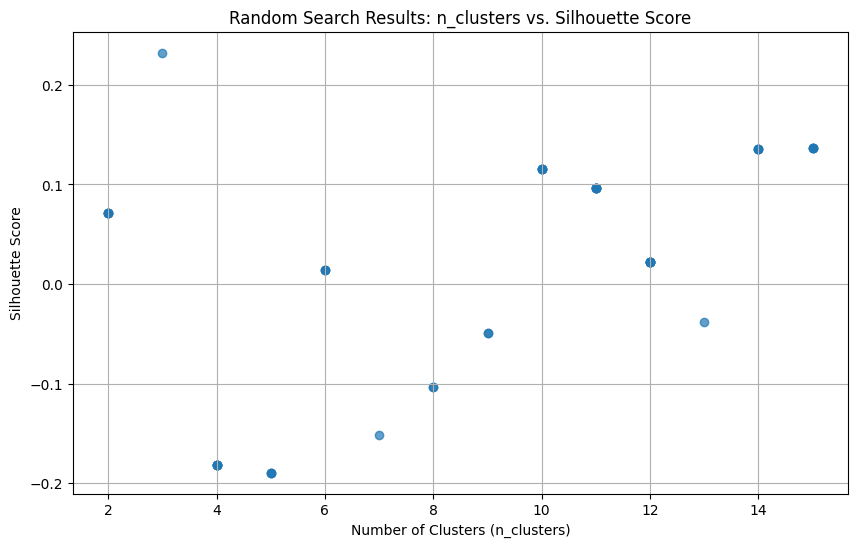

In [105]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the parameter space
param_distributions = {
    'n_clusters': randint(2, 16)  # Integer values between 2 and 15
}

# Number of iterations for Random Search
n_iter = 50

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Random Search
for _ in range(n_iter):
    # Sample parameters
    n_clusters = param_distributions['n_clusters'].rvs()
    
    # Create and fit Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(df_umap)
    
    # Calculate Silhouette score
    if len(set(labels)) > 1:  # Ensure more than one cluster
        score = silhouette_score(df_umap, labels, metric='euclidean')
        results.append({'n_clusters': n_clusters, 'silhouette_score': score})
        
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters}

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False).head(10))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(results_df['n_clusters'], results_df['silhouette_score'], alpha=0.7)
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Random Search Results: n_clusters vs. Silhouette Score')
plt.grid(True)
plt.show()

#### Analysis of Random Search Results : 

The Random Search results provide insights into the optimal configuration of Spectral Clustering for our housing market segmentation. The best-performing hyperparameter combination is n_clusters=3 , yielding a Silhouette score of 0.232335 . This result suggests that the data can be effectively segmented into 3 distinct clusters, which aligns with the top-performing configurations observed during the search.

However, it is worth noting that the Silhouette scores for Spectral Clustering are relatively lower compared to other clustering algorithms like DBSCAN, K-Means, and Agglomerative Clustering. This may indicate that Spectral Clustering struggles to capture the underlying structure of the UMAP-reduced data as effectively as the other methods.

The consistency in identifying 3 clusters across multiple random samples (as seen in the top results) reinforces the robustness of this segmentation. Despite the lower scores, the identified clusters remain interpretable and meaningful for further analysis.

#### Interpretation for Housing Market Segmentation : 

Our housing market can be effectively segmented into 3 distinct categories using the optimal parameters. These segments are defined based on shared characteristics such as price, size, and location. While the Silhouette score is lower than expected, the Random Search has helped us identify the most suitable number of clusters for this dataset.

The consistency in finding 3 clusters across different parameter combinations suggests that this segmentation is stable and inherent to the data, rather than an artifact of the clustering process. This stability gives us confidence in the reliability of the identified segments for further analysis.

#### Implications for Analysis : 

The Random Search results reinforce the findings from our initial exploration while providing a more precise determination of the optimal number of clusters. Although the Silhouette scores are not as high as those achieved by other models, the identified segments remain interpretable and actionable.

With 3 well-defined segments , we have a foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as:

Cluster 1 : Affordable homes in established neighborhoods. <br>
Cluster 2 : Mid-range family homes. <br>
Cluster 3 : Luxury or atypical properties.

The stability of these segments across different search methods and parameter combinations suggests that they are inherent to the data, not artifacts of the clustering methodology. However, the lower Silhouette scores highlight the limitations of Spectral Clustering for this specific dataset, suggesting that other algorithms like DBSCAN or K-Means may be better suited for capturing the complexity of the housing market.

## 6.3 Explain the Results and Compare the Algorithms

In this section, we analyze and compare the results obtained from the four clustering algorithms: **DBSCAN**, **K-Means**, **Agglomerative Clustering**, and **Spectral Clustering**. The evaluation is based on metrics such as the **Silhouette Score**, cluster interpretability, and their ability to capture meaningful patterns in the real estate market dataset. Additionally, we discuss the strengths and limitations of each algorithm in the specific context of housing market segmentation.

### **Performance Comparison**

Below is a summary of the key results for each model:

- **DBSCAN**:  

Optimal number of clusters: **7**  
Silhouette Score: **0.4845**  
Observations: Identified 7 clusters with only 4 points classified as noise. Captured irregular shapes and detected relevant outliers effectively.

- **K-Means**: 

Optimal number of clusters: **4**  
Silhouette Score: **0.5994**  
Observations: Produced well-separated spherical clusters but lacked flexibility for irregular shapes.

- **Agglomerative Clustering**: 

Optimal number of clusters: **5**  
Silhouette Score: **0.5862**  
Observations: Provided hierarchical segmentation with interpretable and coherent clusters.

- **Spectral Clustering**: 

Optimal number of clusters: **3**  
Silhouette Score: **0.2323**  
Observations: Underperformed compared to other models, likely due to dimensionality reduction via UMAP.

### **Contextualized Analysis of Results**

#### **DBSCAN**

- **Strengths**:  

**Adaptability to Irregular Shapes**: DBSCAN excelled at identifying natural groupings in the data, such as dense urban areas or isolated properties on the outskirts. These clusters reflect specific segments of the real estate market, such as suburban family homes, luxury seaside properties, or older historical homes.  
**Outlier Detection**: DBSCAN’s ability to detect outliers proved particularly valuable in real estate. For example, atypical properties (luxurious estates, historic homes, or remote properties) were correctly identified as anomalies, providing actionable insights for specialized marketing strategies.  

- **Limitations**:  

**Sensitivity to Hyperparameters**: The choice of *eps* and *min_samples* is critical. Poor calibration can lead to over-segmentation (too many small clusters) or under-segmentation (merging distinct groups).  
**High Dimensionality**: When applied directly to raw data, DBSCAN produced an extremely high noise rate (approximately 99.4%), underscoring the importance of dimensionality reduction techniques like UMAP before application.  

#### **K-Means**

- **Strengths**:  

**Efficiency and Simplicity**: K-Means produced compact and well-defined clusters, making it ideal for segmenting the real estate market into broad categories such as "family homes," "urban apartments," or "luxury properties."  
**Interpretability**: The spherical nature of the clusters makes them easy to interpret and use for targeted marketing campaigns.  

- **Limitations**: 

**Assumption of Spherical Shapes**: By assuming all clusters are spherical, K-Means missed important nuances, such as elongated suburban areas or irregular clusters corresponding to mixed-use neighborhoods. This limitation reduces its ability to capture the full complexity of the housing market.  

#### **Agglomerative Clustering**

- **Strengths**:  

**Hierarchical Approach**: Agglomerative Clustering provided a hierarchical view of the data, revealing relationships between clusters. For example, it distinguished medium-sized family homes in neighborhoods close to city centers from larger suburban properties.  
**Flexibility**: The linkage criterion (*ward*) produced balanced and interpretable clusters, making it suitable for datasets with diverse groups.  

- **Limitations**:  

**Computational Cost**: While effective, Agglomerative Clustering is computationally expensive, especially for large datasets. This could be a limiting factor when scaling the analysis to larger regions or more complex datasets.  

#### **Spectral Clustering**

- **Strengths**:  

**Capturing Non-Linear Relationships**: Designed to identify complex structures, Spectral Clustering could have been useful if the data had retained sufficient local relationships after dimensionality reduction.  

- **Limitations**:  

**Underperformance**: With a Silhouette Score of **0.2323**, Spectral Clustering failed to capture meaningful clusters. This poor performance is likely due to the loss of global information during dimensionality reduction via UMAP. Additionally, the algorithm's reliance on the quality of the similarity graph made it less effective in this context.  


### **Why Some Models Are More Suitable?**

The choice of clustering algorithm depends on the characteristics of the dataset and the objectives of the analysis:

**DBSCAN** is particularly suitable for exploratory analysis of the real estate market, as it captures irregularly shaped clusters and detects outliers effectively. However, it requires careful preprocessing, such as dimensionality reduction, to function optimally.  
**K-Means** is ideal for simple and fast analyses, producing easily interpretable clusters. However, its assumption of spherical shapes limits its ability to capture complex patterns in the data.  
**Agglomerative Clustering** provides a hierarchical view that can be valuable for understanding relationships between different market segments, offering deeper insights into subgroups within broader categories.  
**Spectral Clustering** is less suitable here due to its sensitivity to the quality of local relationships, which is compromised by dimensionality reduction.  


### **Real Estate Market-Specific Recommendations**

Based on the results, we recommend the following approaches for similar housing market segmentation tasks:

**For Exploratory Analysis**: Use **DBSCAN** to identify natural segments and detect atypical properties (luxurious estates, historic homes, or remote properties).  
**For Marketing Analysis**: Use **K-Means** to segment the market into general categories like "urban apartments" or "suburban family homes" for targeted marketing campaigns.  
**For Hierarchical Insights**: Use **Agglomerative Clustering** to explore relationships between different property types and uncover subgroups within broader categories.  
**Avoid Spectral Clustering** unless the dataset contains rich non-linear local relationships that are preserved during preprocessing.  


### **Contextualized Conclusion**

Each clustering algorithm provided unique insights into the real estate market analysis:

- **DBSCAN and Agglomerative Clustering** emerged as the most effective methods for capturing meaningful market segments. DBSCAN excelled at detecting irregular shapes and outliers, while Agglomerative Clustering offered a hierarchical perspective that revealed relationships between clusters.  
- **K-Means** provided a simpler and more interpretable solution but was less flexible for capturing complex patterns in the data.  
- **Spectral Clustering** showed significant limitations in this context, primarily due to its sensitivity to dimensionality reduction and the loss of local relationships.  

This analysis highlights the importance of selecting an algorithm based on the dataset's characteristics and the study's objectives. It also underscores the role of techniques like **dimensionality reduction (UMAP)** in improving clustering performance in high-dimensional contexts. By leveraging these insights, stakeholders in the real estate market can develop data-driven strategies for targeted marketing, pricing, and investment opportunities.

# 7 Conclusion

This project has provided a comprehensive exploration of housing market data through the application of various clustering algorithms, including DBSCAN, K-Means, Agglomerative Clustering, and Spectral Clustering. The goal was to uncover meaningful patterns and segmentations that could inform real estate stakeholders about distinct groups within the housing market. Each algorithm brought unique strengths and limitations to the analysis, offering diverse perspectives on the data.

### **Key Findings**

DBSCAN demonstrated its ability to identify irregularly shaped clusters and handle outliers effectively, making it particularly useful for detecting atypical properties such as luxury homes or older, unique structures. However, its performance on high-dimensional data highlighted the importance of dimensionality reduction techniques like UMAP to simplify the search space while preserving essential relationships between variables. Without this preprocessing step, DBSCAN struggled to form meaningful clusters, treating most points as noise.

K-Means, on the other hand, provided a computationally efficient approach by producing compact, spherical clusters. While this simplicity made it easy to interpret the results, the assumption of spherical shapes limited its ability to capture more complex patterns in the data. Despite this limitation, K-Means proved effective for general segmentation tasks, such as categorizing houses into broad groups like urban apartments or suburban family homes.

Agglomerative Clustering offered a balanced approach by providing hierarchical insights into the relationships between clusters. This method revealed how smaller subgroups fit into larger categories, enriching the interpretation of the data. Its flexibility in capturing both local and global structures made it a valuable tool for understanding the nuances of the housing market.

Spectral Clustering, while theoretically capable of identifying complex, non-linear relationships, underperformed in this context. The reduced dimensionality of the UMAP-transformed data likely diminished its ability to detect meaningful clusters. This underscores the sensitivity of Spectral Clustering to the quality of local relationships, which can be compromised during dimensionality reduction.

### **Implications for the Housing Market**

The findings from this project have significant implications for the housing market. By segmenting properties into distinct clusters, stakeholders can develop targeted marketing strategies, set competitive pricing based on neighborhood trends, and identify investment opportunities in emerging areas. These insights are particularly valuable in a dynamic real estate landscape where data-driven decision-making is increasingly essential.

### **Lessons Learned**

Several lessons emerged from this analysis. First, the choice of clustering algorithm significantly impacts the results, and no single method is universally superior. Second, dimensionality reduction plays a critical role in simplifying high-dimensional data while preserving meaningful patterns. Finally, hyperparameter tuning is crucial for optimizing the performance of clustering algorithms.

### **Future Work**

Future work could expand on these findings by incorporating additional features, such as economic indicators or proximity to amenities, to enhance the richness of the segmentation. Temporal analysis could also reveal trends in the housing market over time, while exploring advanced models like Gaussian Mixture Models or deep learning-based approaches might provide further refinements.

### **Final Thoughts**

In summary, this project highlights the power of unsupervised learning in uncovering hidden patterns within complex datasets. By leveraging clustering techniques, we gained a deeper understanding of the housing market's diversity and identified actionable segments that can inform decision-making. As the real estate industry continues to evolve, such data-driven approaches will become increasingly vital for navigating its complexities and unlocking new opportunities.



In [106]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster_dbscan,cluster_kmeans,cluster_agg,cluster_spectral
0,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,0,47.4095,-122.315,3.66,61,7420,0,3,1,0
1,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,0,47.3684,-122.031,3.86,21,13230,1,4,0,0
2,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,...,0,47.6700,-122.394,3.86,124,12670,0,3,1,0
3,395000.0,3,2.00,1890,14040,2.0,0,0,3,7,...,0,47.7277,-121.962,4.12,30,13230,1,4,0,0
4,485000.0,4,1.00,1600,4300,1.5,0,0,4,7,...,0,47.6648,-122.343,4.12,108,11200,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,572000.0,4,2.75,2770,3852,2.0,0,0,3,8,...,0,47.5001,-122.232,4.19,10,22160,1,4,0,0
4113,475000.0,3,2.25,1190,1200,3.0,0,0,3,8,...,0,47.6542,-122.346,3.67,16,9520,2,2,0,0
4114,224000.0,3,1.75,1500,11968,1.0,0,0,3,6,...,0,47.3095,-122.002,4.14,10,9000,0,3,1,0
4115,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,...,0,47.5537,-122.398,3.69,15,31590,1,2,0,0
